#  <span style="color:orange">Chiwa Basin Health Model</span>

**Date Updated: Jan 04, 2024**

# 1.0  Objective
This model use Chilwa Basin Health dataset and connect it with other environmental parameters using the PyCaret automachine learning tool.

## 1.1 Installing PyCaret
The first step to get started with PyCaret is to install PyCaret. Installation is easy and will only take a few minutes.


In [53]:
# !pip install pycaret[full] -q
# print(pycaret.__version__)

# 2.0 Getting the Data

The code loads a dataset from an Excel file hosted on GitHub. It converts the index of the dataset to datetime format and extracts the year and month information. The resulting dataset is then indexed by 'Year' and 'Month'. Finally, the code displays the data types of the columns and the shape of the dataset.

Here I read data from my GitHub account.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ChilwaBasinAllData/Dataset/dataset_05.12.xlsx?raw=true'
url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ChilwaBasinDataUpdated2024/Dataset/ChilwaBasin_Dataset_01012024.xlsx?raw=true'
data = pd.read_excel(url)

# Convert the index to datetime format (assuming the index is in a date format)
data.index = pd.to_datetime(data.iloc[:, 0])

# Extract year and month from the index
data['Year'] = data.index.year
data['Month'] = data.index.month

# Set the columns 'Year' and 'Month' as the index
data.set_index(['Year', 'Month'], inplace=True)

# Check the type of dataset
print("Data types:", data.dtypes)

# Check the shape of the data
print("Data shape:", data.shape)

# Convert the column names to an array
headers = data.columns.to_numpy()

# Print the headers array
print("Headers:", headers)

Data types: Date                              datetime64[ns]
SatelliteAverageMinTemperature           float64
SatelliteAverageMaxTemperature           float64
AverageMeanTemperature                   float64
AverageMeanTemperatureAnomaly            float64
                                       ...      
RiceAreaTotal_HA                         float64
RiceProductionTotal_MT                   float64
TobaccoAreaTotal_HA                      float64
TobaccoProductionTotal_MT                float64
UREATotal_T                              float64
Length: 128, dtype: object
Data shape: (924, 128)
Headers: ['Date' 'SatelliteAverageMinTemperature' 'SatelliteAverageMaxTemperature'
 'AverageMeanTemperature' 'AverageMeanTemperatureAnomaly'
 'AverageMeanTemperatureStandardizedAnomaly' 'ChancoMeanTemperature'
 'ChingaleMeanTemperature' 'MakokaMeanTemperature'
 'NaminjiwaMeanTemperature' 'NtajaMeanTemperature'
 'ZombaRTCMeanTemperature' 'AverageMinTemperature'
 'AverageMinTemperatureAnomaly' 'Ave

# 3.0  Analyzing Missing Values

##3.1 Analysis of Missing Values in Dataset: Identification, Removal, and Visualization

The code performs an analysis of missing values in a dataset. It calculates the number and percentage of missing values for each column, sorts them in descending order based on the missing percentage, and prints the information. The missing values information is then saved as an Excel file.

Next, the code drops rows that contain any missing values (NaN) from the dataset and displays the rows with all values present. The rows with complete data are saved as an Excel file.

The code also generates a bar plot to visualize the missing values, with variables on the x-axis and the corresponding missing percentage on the y-axis. The plot is saved as a high-quality JPG file and displayed.

Overall, the code provides insights into the missing values in the dataset, presents the rows with complete data, and visualizes the missing values distribution.


Missing Values:
                          Missing Values  Missing Percentage
UREA_T_D2                            914           98.917749
UREA_T_D4                            914           98.917749
UREA_T_D1                            914           98.917749
TobaccoProduction_MT_D2              911           98.593074
MaizeArea_HA_D1                      911           98.593074
...                                  ...                 ...
ChimpeniRainfall                      12            1.298701
Waterloggingkm2                        0            0.000000
ReturnPeriod                           0            0.000000
SatelliteAverageRainfall               0            0.000000
Date                                   0            0.000000

[128 rows x 2 columns]

Rows with all values present:
Empty DataFrame
Columns: [Date, SatelliteAverageMinTemperature, SatelliteAverageMaxTemperature, AverageMeanTemperature, AverageMeanTemperatureAnomaly, AverageMeanTemperatureStandardizedAnomaly, Ch

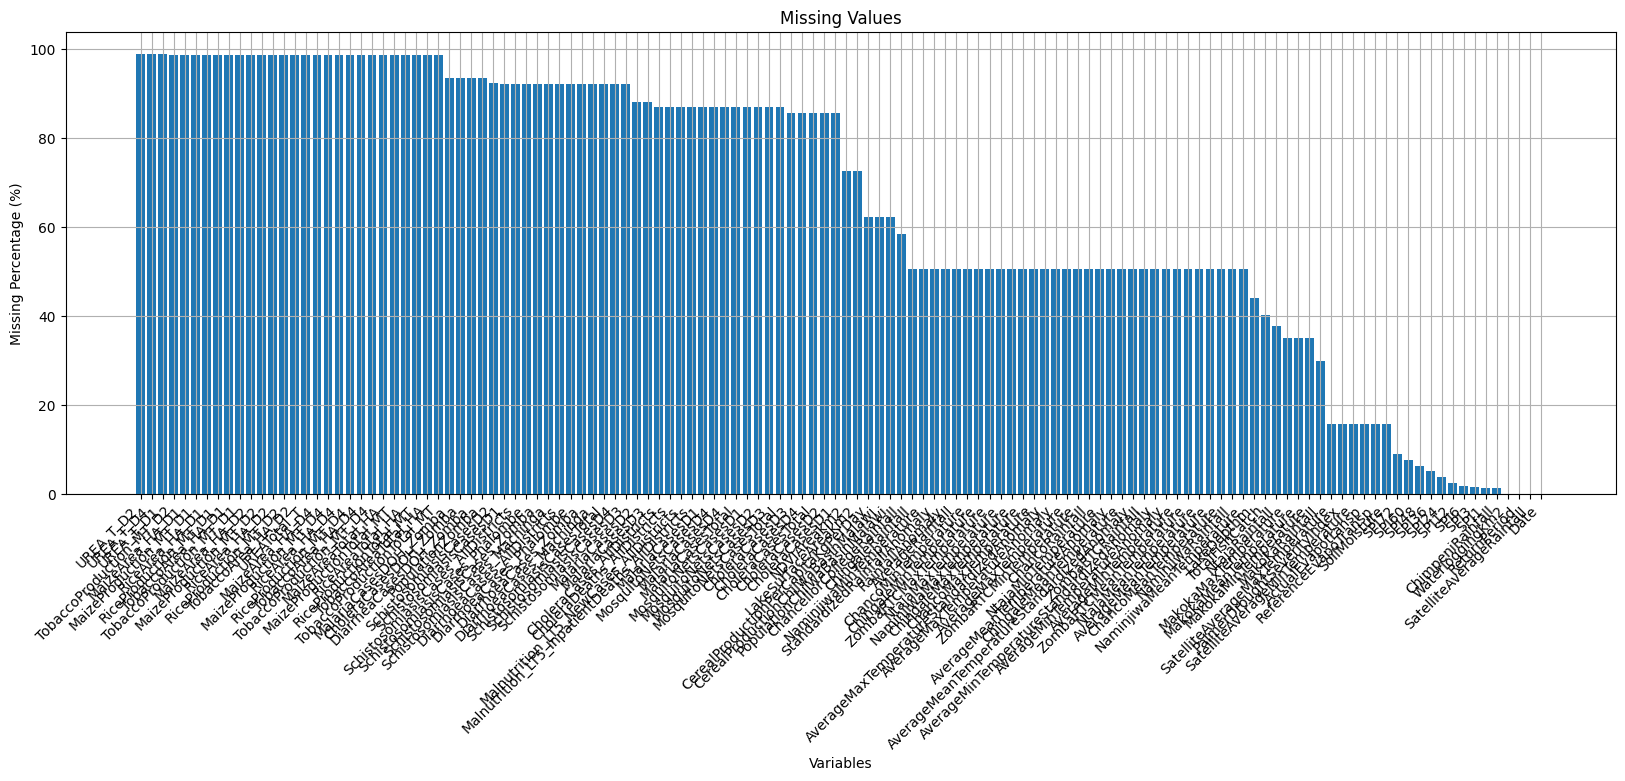

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Sort columns based on missing percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Print the missing values information
print("\nMissing Values:")
print(missing_df)

# Save the missing values information as an Excel file
missing_df.to_excel("missing_values.xlsx")

# Drop rows with any missing values (NaN)
non_nan_rows = data.dropna()

# Display the rows with all values present
print("\nRows with all values present:")
print(non_nan_rows.head(5))

# Save the rows with all values present as an Excel file
non_nan_rows.to_excel("non_nan_rows.xlsx")

# Plotting the missing values
plt.figure(figsize=(20, 6))
plt.bar(missing_df.index, missing_df['Missing Percentage'])
plt.xlabel('Variables')
plt.ylabel('Missing Percentage (%)')
plt.title('Missing Values')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Save the plot as a high-quality JPG file
plt.savefig('missing_values_plot.jpg', dpi=300, bbox_inches='tight')

# Save the plot as a high-quality PNG file
#plt.savefig('missing_values_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## 3.2 Visualizing Missing Values with Heatmap

This code generates a heatmap to visualize the missing values in a dataset using the seaborn library. It excludes the first column of the dataset, assuming it contains non-date values. The heatmap represents missing values as colored cells, with missing values shown as blank spaces. The plot is customized by rotating the x and y-axis labels, adding a title and axis labels, and including grid lines. The resulting plot is saved as a high-quality JPG file. This code provides a quick and visual overview of the missing values distribution in the dataset.

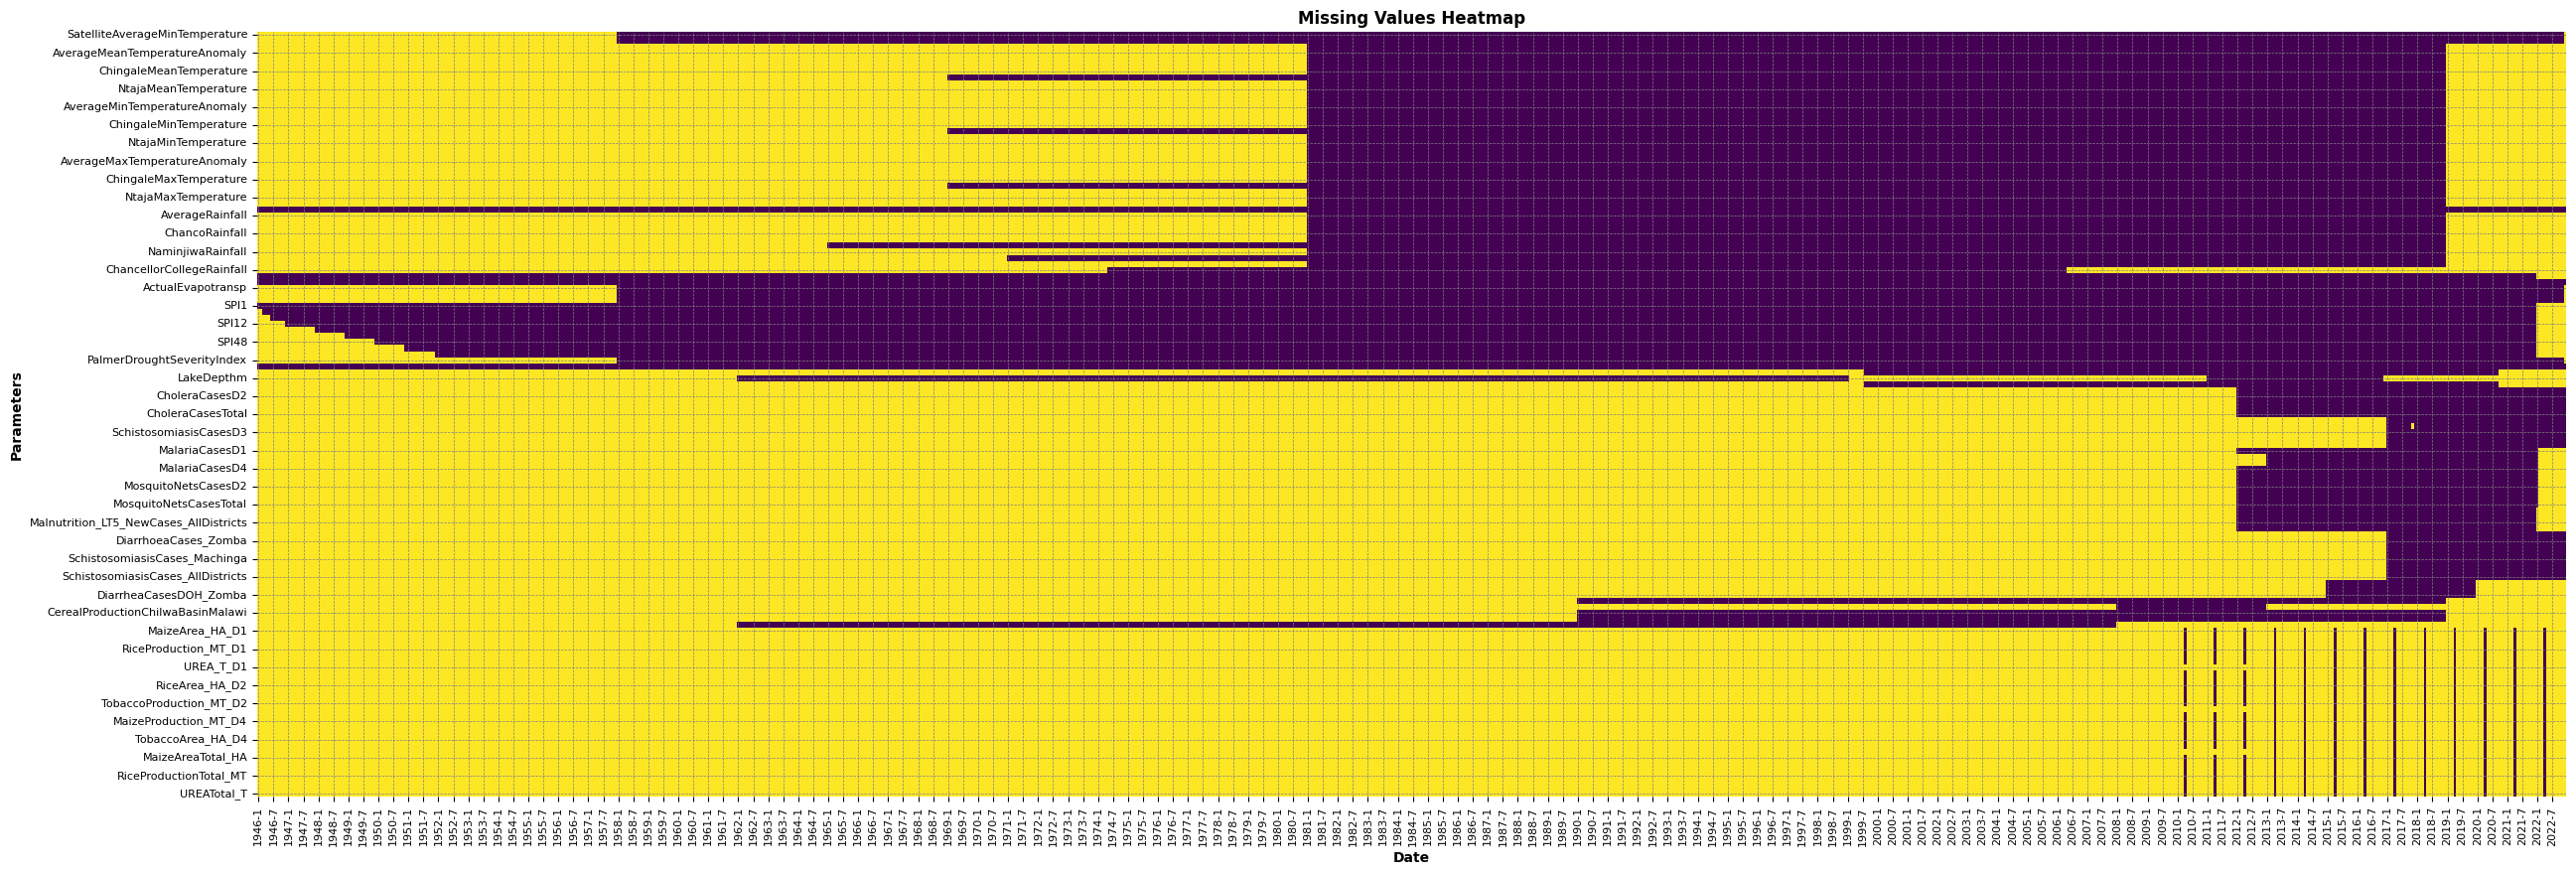

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the first column (assuming it contains non-date values)
data_without_dates = data.iloc[:, 1:]

# Create the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(data_without_dates.isnull().transpose(), cmap='viridis', cbar=False)

# Customize the plot
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Missing Values Heatmap', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Parameters', fontweight='bold')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Save the plot in high-quality JPG format
plt.savefig('missing_values_heatmap.jpg', dpi=300, bbox_inches='tight')
#plt.savefig('missing_values_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

## 3.3 Analyzing Start and End Dates for Columns with Missing Values

This code analyzes the start and end dates of columns in a dataset that have missing values. It retrieves the start and end dates for each column, calculates the duration in months and years, and generates a table with the column name, start date, end date, years of data, and months of data. The table is printed and saved as an Excel file.

In [6]:
import pandas as pd
from tabulate import tabulate
from datetime import datetime

# The dataset is called 'data'
start_dates = {}
end_dates = {}
months_data = {}
years_data = {}

for column in data.columns:
    not_missing_mask = data[column].notna()  # Boolean mask where True indicates a non-missing value
    not_missing_data = data.loc[not_missing_mask]  # Subset of data with no missing values

    if not_missing_data.empty:
        continue

    start_date = not_missing_data.iloc[0, 0]  # Value at the first row and first column
    end_date = not_missing_data.iloc[-1, 0]  # Value at the last row and first column

    start_dates[column] = start_date
    end_dates[column] = end_date
    months_data[column] = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1
    years_data[column] = end_date.year - start_date.year + 1

# Prepare the data for tabulation
table_data = []
for column, start_date in start_dates.items():
    end_date = end_dates[column]
    # Format dates to remove hour and day
    start_date = datetime.strftime(start_date, "%Y-%m")
    end_date = datetime.strftime(end_date, "%Y-%m")
    table_data.append([column, start_date, end_date, years_data[column], months_data[column]])

# Sort the table based on the number of missing data (ascending order)
table_data.sort(key=lambda x: data[x[0]].isnull().sum())

# Generate the table
table_headers = ["Column", "Start Date", "End Date", "Years Data", "Months Data"]
table = tabulate(table_data, headers=table_headers, tablefmt="pipe")

# Print the table
print(table)

# Save the table as an Excel file
df = pd.DataFrame(table_data, columns=table_headers)
df.to_excel("start_end_dates_sorted.xlsx", index=False)

| Column                                        | Start Date   | End Date   |   Years Data |   Months Data |
|:----------------------------------------------|:-------------|:-----------|-------------:|--------------:|
| Date                                          | 1946-01      | 2022-12    |           77 |           924 |
| SatelliteAverageRainfall                      | 1946-01      | 2022-12    |           77 |           924 |
| ReturnPeriod                                  | 1946-01      | 2022-12    |           77 |           924 |
| Waterloggingkm2                               | 1946-01      | 2022-12    |           77 |           924 |
| ChimpeniRainfall                              | 1946-01      | 2021-12    |           76 |           912 |
| SPI1                                          | 1946-01      | 2021-12    |           76 |           912 |
| SPI3                                          | 1946-03      | 2021-12    |           76 |           910 |
| SPI6             

## 3.4 Analyzing Health and Disease data (missing values)

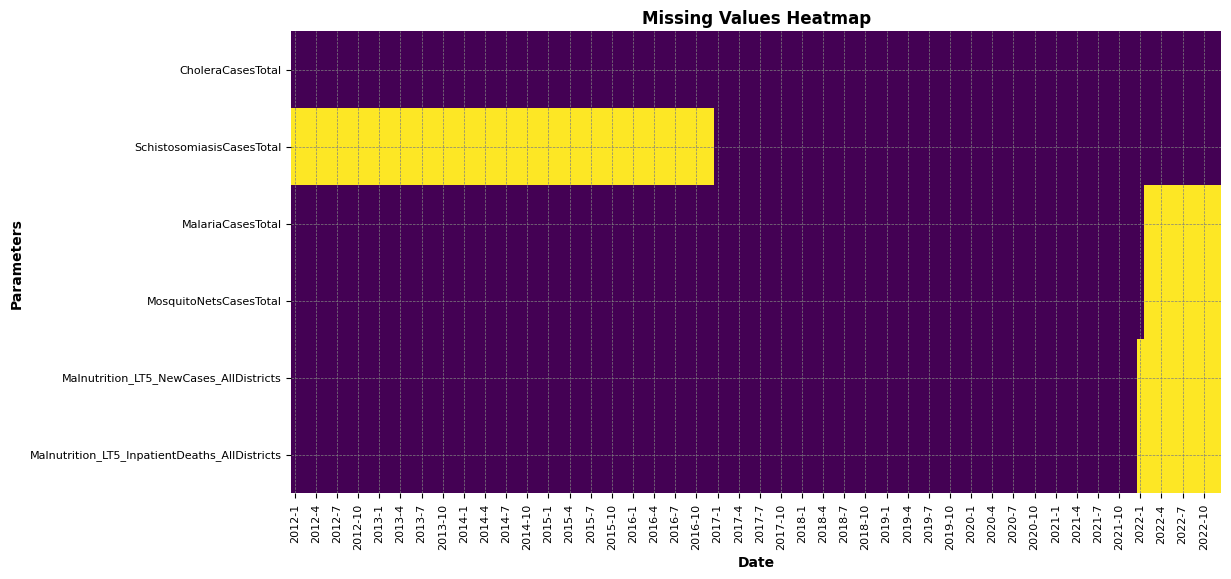

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Define the columns for the heatmap
columns = ['CholeraCasesTotal' ,
 'SchistosomiasisCasesTotal' ,'MalariaCasesTotal',
 'MosquitoNetsCasesTotal',
 'Malnutrition_LT5_NewCases_AllDistricts',
 'Malnutrition_LT5_InpatientDeaths_AllDistricts']

# Select the specified columns from the dataset
subset_data = data[columns]

# Filter the data to include only dates starting from '2012-01'
start_date = '2012-01'
subset_data = subset_data.loc[data['Date'] >= start_date]

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(subset_data.isnull().transpose(), cmap='viridis', cbar=False)

# Customize the plot
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Missing Values Heatmap', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Parameters', fontweight='bold')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Save the plot in high-quality JPG format
plt.savefig('missing_values_heatmap_specific_columns.jpg', dpi=300, bbox_inches='tight')
#plt.savefig('missing_values_heatmap_specific_columns.png', dpi=300, bbox_inches='tight')

plt.show()

## 3.5 Visualizing the Correlation

The heatmap visualizes the correlations between numerical features in the dataset, with bold and legible correlation values. The plot is saved as high-quality JPG and PNG images, and the correlation matrix is exported to an Excel file. This allows for easy identification of feature relationships and patterns in the data.

**Pearson Correlation Coefficient:**

Pearson correlation is the most widely used method for measuring the linear correlation between two continuous variables.
It assumes that the variables are normally distributed and the relationship between them is linear.
The values of Pearson correlation range from -1 to 1, where -1 indicates a perfect negative linear correlation, 1 indicates a perfect positive linear correlation, and 0 indicates no linear correlation.

**Spearman Rank Correlation:**
Spearman correlation is a non-parametric measure of rank correlation between two variables.
It does not assume a linear relationship and is suitable for both continuous and ordinal variables.
It calculates the correlation based on the ranks of the data rather than the raw data values.
Spearman correlation is robust to outliers and is useful when the data is not normally distributed.

**Kendall's Tau Correlation:**
Kendall's Tau is another non-parametric measure of rank correlation, similar to Spearman correlation.
It measures the similarity in the order of ranks between two variables.
Like Spearman correlation, Kendall's Tau is suitable for both continuous and ordinal variables and is robust to outliers.

<ipython-input-15-3c1e082adcbe>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson = data.corr()


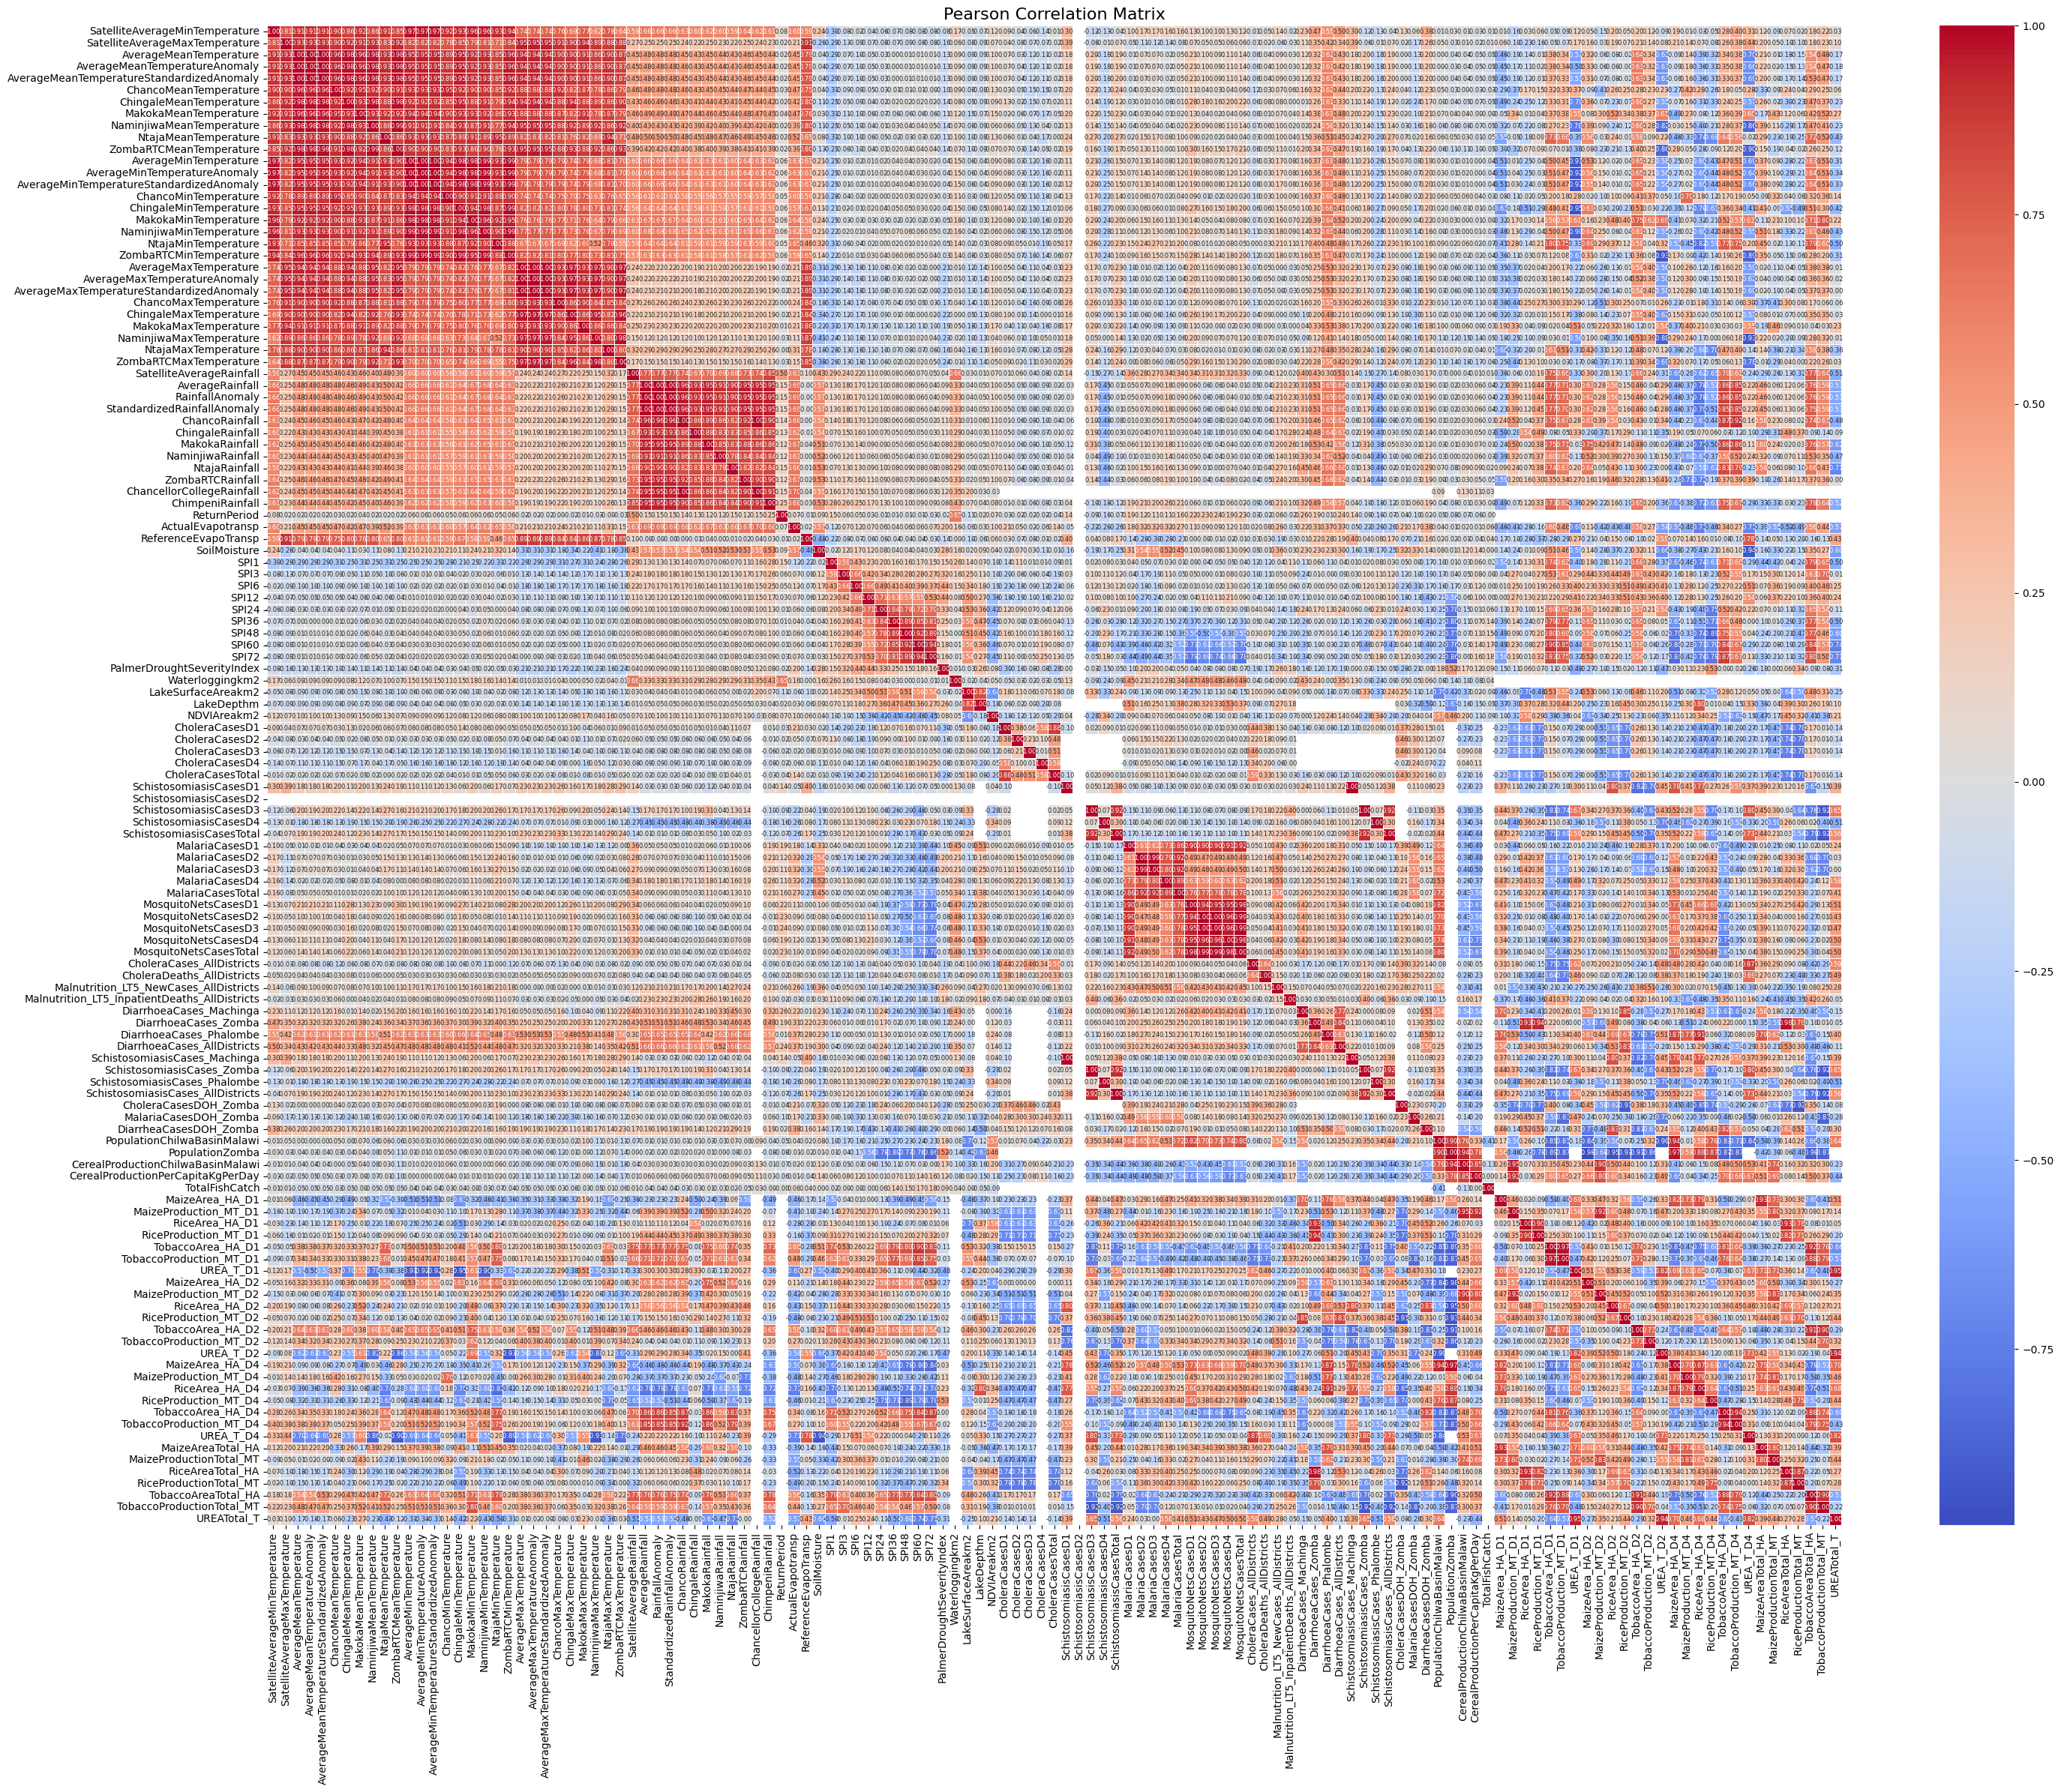

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Calculate Pearson Correlation
correlation_matrix_pearson = data.corr()

# Set the figure size and annotation font size
plt.figure(figsize=(30, 24))  # Increase the figure size for better visibility

# Plot the Pearson correlation matrix
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6}, linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=16)  # Increase the title font size

# Rotate the feature names on the x-axis
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotate and center x-axis labels for better readability

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Save the plot in high-quality JPG format
plt.savefig('pearson_correlation_matrix_plot.jpg', dpi=300, bbox_inches='tight')

# Save the Pearson correlation matrix as an Excel file
correlation_matrix_pearson.to_excel('pearson_correlation_matrix.xlsx')

# Show the plot
plt.show()

In [28]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Calculate Spearman Rank Correlation
# correlation_matrix_spearman = data.corr(method='spearman')

# # Set the figure size and annotation font size
# plt.figure(figsize=(20, 16))

# # Plot the Spearman Rank Correlation Matrix
# sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
# plt.title('Spearman Rank Correlation Matrix', fontsize=12)

# # Rotate the feature names on the x-axis
# plt.xticks(rotation=45, ha='right', fontsize=8)

# # Save the plot in high-quality JPG format
# #plt.savefig('spearman_correlation_matrix_plot.jpg', dpi=300, bbox_inches='tight')

# Save the Spearman correlation matrix as an Excel file
# correlation_matrix_spearman.to_excel('spearman_correlation_matrix.xlsx')

# Show the plot
#plt.show()

In [29]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named 'data'
# # Calculate Kendall's Tau Correlation
# correlation_matrix_kendall = data.corr(method='kendall')

# # Set the figure size and annotation font size
# plt.figure(figsize=(20, 16))

# # Plot the Kendall's Tau Correlation Matrix
# sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
# plt.title('Kendall Tau Correlation Matrix', fontsize=12)

# # Rotate the feature names on the x-axis
# plt.xticks(rotation=45, ha='right', fontsize=8)

# # Save the plot in high-quality JPG format
# #plt.savefig("kendall_correlation_matrix_plot.jpg", dpi=300, bbox_inches='tight')

# # Save the Kendall's Tau correlation matrix as an Excel file
# correlation_matrix_kendall.to_excel("kendall_correlation_matrix.xlsx")

# # Show the plot
# #plt.show()


<ipython-input-23-9c493676569b>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson = data_selected_features.corr()


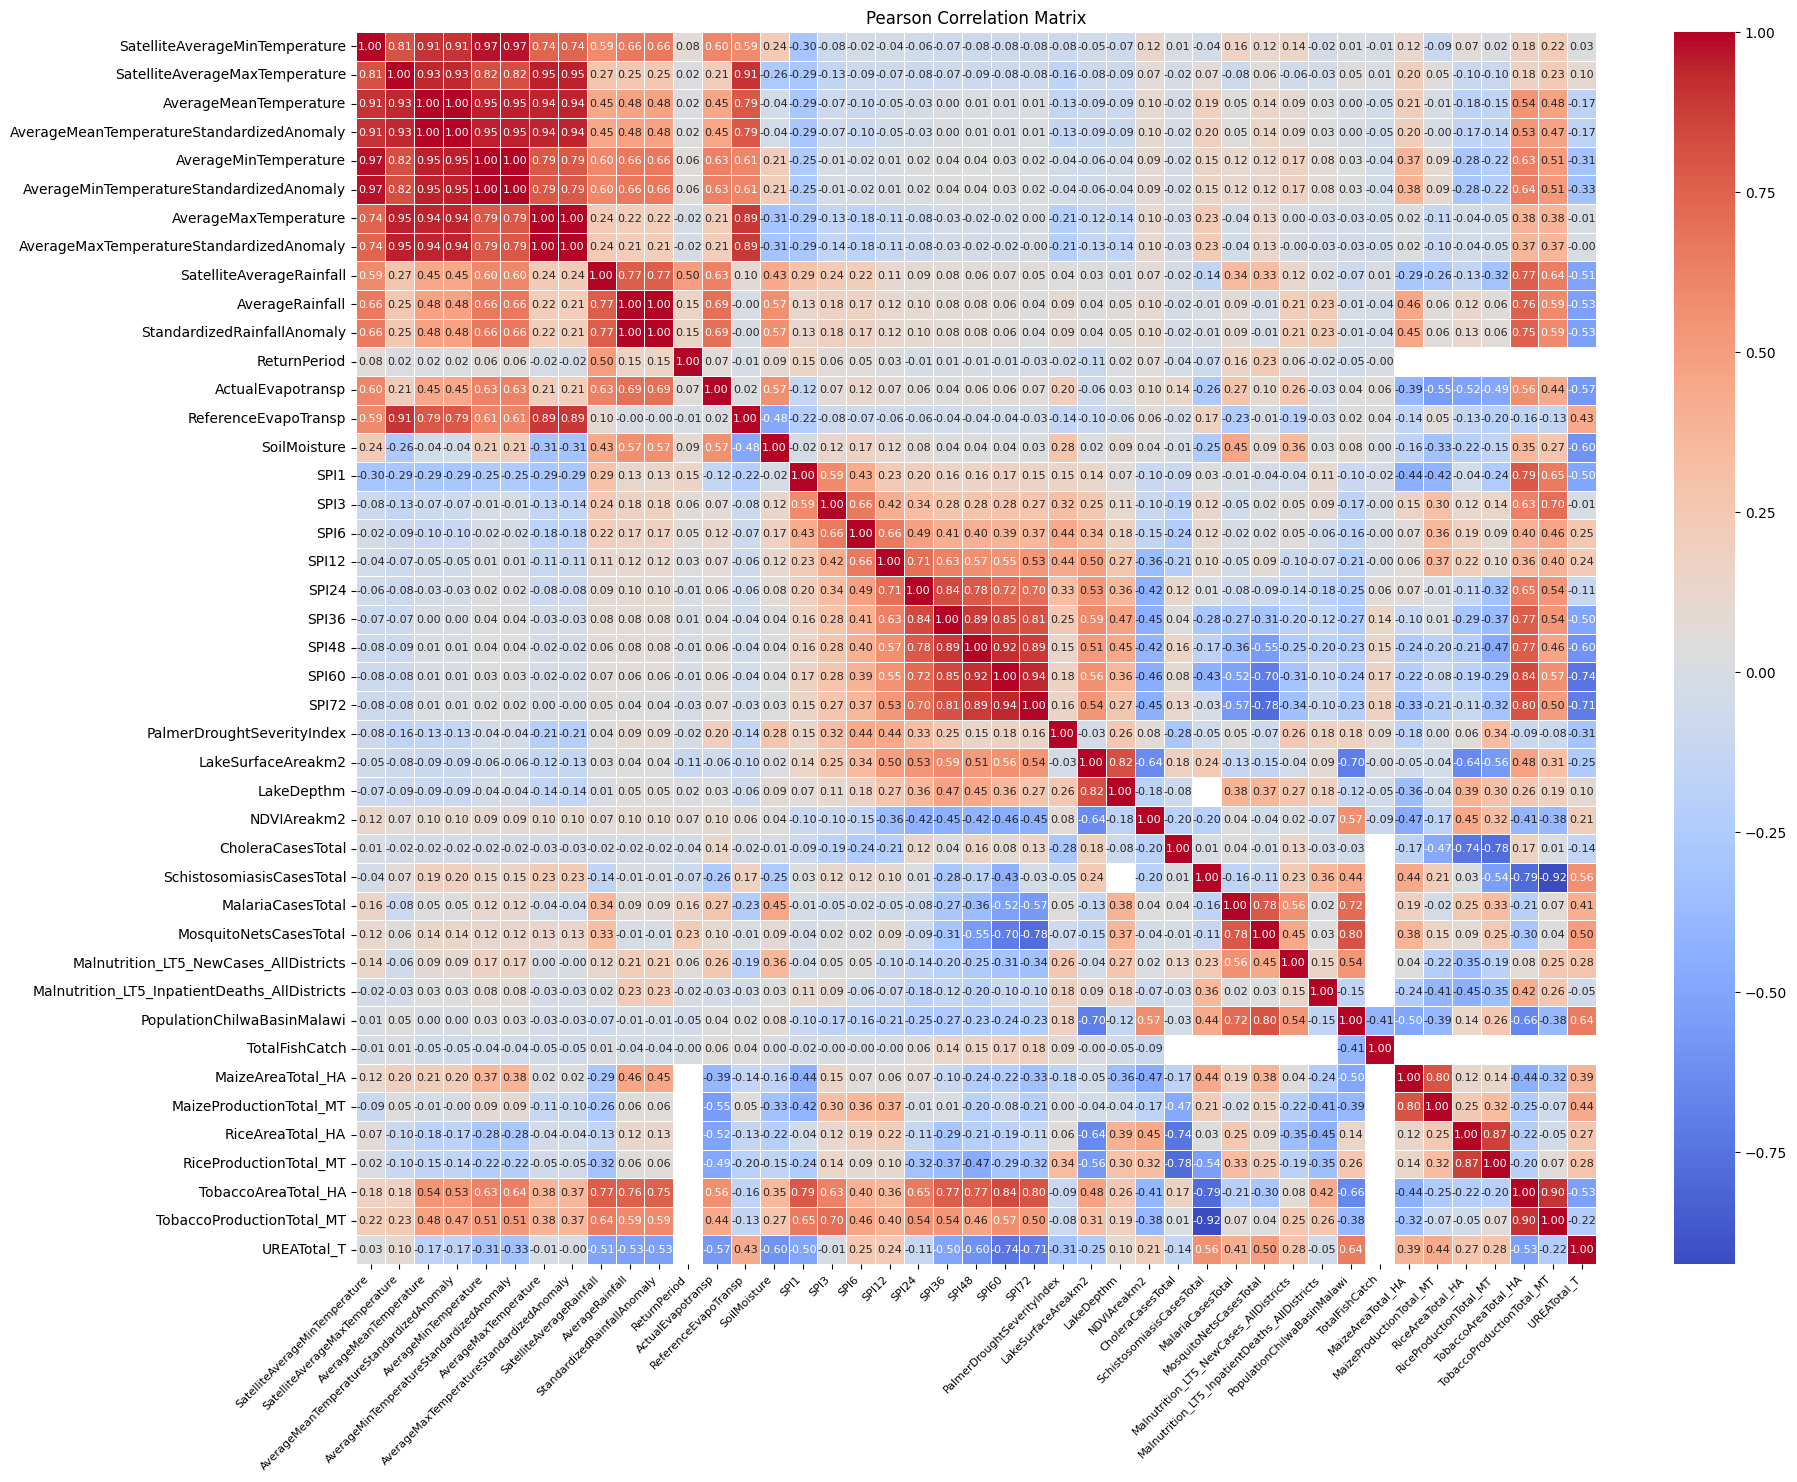

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming your DataFrame is named 'data'
selected_features = ['Date', 'SatelliteAverageMinTemperature', 'SatelliteAverageMaxTemperature',
 'AverageMeanTemperature',
 'AverageMeanTemperatureStandardizedAnomaly',
 'AverageMinTemperature',
 'AverageMinTemperatureStandardizedAnomaly',
 'AverageMaxTemperature',
 'AverageMaxTemperatureStandardizedAnomaly',
 'SatelliteAverageRainfall',
 'AverageRainfall' ,
 'StandardizedRainfallAnomaly',
 'ReturnPeriod' ,'ActualEvapotransp',
 'ReferenceEvapoTransp', 'SoilMoisture', 'SPI1' ,'SPI3' ,'SPI6', 'SPI12',
 'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'PalmerDroughtSeverityIndex',
 'LakeSurfaceAreakm2' ,'LakeDepthm' ,'NDVIAreakm2',
 'CholeraCasesTotal', 'SchistosomiasisCasesTotal' , 'MalariaCasesTotal',
 'MosquitoNetsCasesTotal',
 'Malnutrition_LT5_NewCases_AllDistricts',
 'Malnutrition_LT5_InpatientDeaths_AllDistricts',
 'PopulationChilwaBasinMalawi',
 'TotalFishCatch', 'MaizeAreaTotal_HA', 'MaizeProductionTotal_MT',
 'RiceAreaTotal_HA', 'RiceProductionTotal_MT', 'TobaccoAreaTotal_HA',
 'TobaccoProductionTotal_MT', 'UREATotal_T']

# Filter the DataFrame to include only the selected features
data_selected_features = data[selected_features]

# Calculate Pearson Correlation
correlation_matrix_pearson = data_selected_features.corr()

# Set the figure size and annotation font size
plt.figure(figsize=(20, 16))

# Define the annotation font size
annot_fontsize = 8

# Plot the Kendall's Tau Correlation Matrix
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": annot_fontsize}, linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=12)

# Rotate the feature names on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=8)

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the plot in high-quality JPG format with a timestamp in the file name
plt.savefig(f'pearson_correlation_matrix_plot_{timestamp}.jpg', dpi=300, bbox_inches='tight')

# Save the Pearson correlation matrix as an Excel file with a timestamp in the file name
correlation_matrix_pearson.to_excel(f'pearson_correlation_matrix_{timestamp}.xlsx', index=False)

# Show the plot
plt.show()


# 4.0 Analyzing Meteorological Data Subset

## 4.1 Temprature
**Can we assume that the temperature of one station represents the temperature for the entire basin?**

We have data available for the Makoka station as well as the average satellite data for the entire basin obtained from the Google Earth Engine. *italicized text*



### 4.1.1 Chart and Pairplot of Temprature
This code processes temperature data, filters it based on a specific date range and desired columns, saves a sub-dataset as an Excel file, and generates line and pair plots. The plots are saved as high-quality PNG and JPG files.

In [30]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
# start_date = '1969-01-01'  # Specify the start date
# end_date = '2008-12-01'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset_temperature['Date'] = pd.to_datetime(sub_dataset_temperature['Date'])

# # Set 'Date' column as the index
# sub_dataset_temperature.set_index('Date', inplace=True)

# # Check the type of dataset
# print("Data types:", sub_dataset_temperature.dtypes)

# # Check the shape of the data
# print("Data shape:", sub_dataset_temperature.shape)

# # Save the subdataset as an Excel file
# sub_dataset_temperature.to_excel("sub_dataset_temperature.xlsx", index=True)

# # Plotting the dataset
# plt.figure(figsize=(12, 6))
# for column in column_names[1:]:
#     sns.lineplot(data=sub_dataset_temperature, x=sub_dataset_temperature.index, y=column)  # Use the index for x-axis

# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.title('Temperature Data')
# plt.legend(column_names[1:])

# # Add grid lines
# plt.grid(True)

# # Set ticks on months
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# # Adjust the axes
# plt.gca().margins(x=0)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Save the plot as a high-quality PNG file
# plt.savefig('temperature_plot.png', dpi=300, bbox_inches='tight')

# # Save the plot as a high-quality JPG file
# plt.savefig('temperature_plot.jpg', dpi=300, bbox_inches='tight')

# # Display the plot
# plt.show()

# # Create a pair plot with regression
# sns.set(font_scale=1.2)  # Increase the font size for better legibility
# pairplot_reg = sns.pairplot(sub_dataset_temperature, kind="reg")
# pairplot_reg.savefig('sub_dataset_temperature_pairplot_reg.png', dpi=300, bbox_inches='tight')
# pairplot_reg.savefig('sub_dataset_temperature_pairplot_reg.jpg', dpi=300, bbox_inches='tight')

# # Create a pair plot without regression
# sns.set(font_scale=1.2)  # Increase the font size for better legibility
# pairplot_scatter = sns.pairplot(sub_dataset_temperature, kind="scatter")
# pairplot_scatter.savefig('sub_dataset_temperature_pairplot_scatter.png', dpi=300, bbox_inches='tight')
# pairplot_scatter.savefig('sub_dataset_temperature_pairplot_scatter.jpg', dpi=300, bbox_inches='tight')

### 4.1.2 Correlation of Temprature
This code processes temperature data, filters it based on a specific date range and desired columns, calculates the correlation matrix, saves it as an Excel file, and generates a correlation heatmap plot. The plot is saved as high-quality PNG and JPG files. Finally, the correlation matrix is displayed.



In [31]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
# start_date = '1969-01-01'  # Specify the start date
# end_date = '2008-12-01'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Set 'Date' column as the index
# sub_dataset_temperature.set_index('Date', inplace=True)

# # Calculate the correlation matrix
# temprature_correlation_matrix = sub_dataset_temperature.corr()

# # Save the correlation matrix as an Excel file
# temprature_correlation_matrix.to_excel('temprature_correlation_matrix.xlsx')

# # Create a correlation heatmap plot
# plt.figure(figsize=(8, 6))
# sns.heatmap(temprature_correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Temprature Correlation Heatmap')
# plt.savefig('temprature_correlation_plot.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('temprature_correlation_plot.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Display the correlation matrix
# print(temprature_correlation_matrix)

------------------------------------------------------------------



### 4.1.3 Temperature Correlation Analysis and Visualization

This code analyzes temperature data by performing correlation analysis and generating visualizations. It filters the data based on a date range, calculates correlations using the Spearman method, creates correlation tables, and generates scatter plots and heatmaps. The results are saved in meaningful file names for easy identification and further analysis.

In [32]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import spearmanr

# # The dataset is called 'data'
# column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
# start_date = '1969-01-01'  # Specify the start date
# end_date = '2008-12-01'  # Specify the end date
# bin_sizes = [5, 10, 15, 20]  # Specify the bin sizes to test

# # Filter the data based on the column names and date range
# sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset_temperature['Date'] = pd.to_datetime(sub_dataset_temperature['Date'])

# # Set 'Date' column as the index
# sub_dataset_temperature.set_index('Date', inplace=True)

# correlation_table = pd.DataFrame(index=bin_sizes, columns=['MaxTemp', 'MinTemp'])

# for bin_size in bin_sizes:
#     # Create categorical bins for 'MaxTemp' and 'MakokaMaxTemp' columns
#     sub_dataset_temperature['MaxTempBins'] = pd.cut(sub_dataset_temperature['MaxTemp'], bins=bin_size, labels=False)
#     sub_dataset_temperature['MakokaMaxTempBins'] = pd.cut(sub_dataset_temperature['MakokaMaxTemp'], bins=bin_size, labels=False)

#     # Calculate the correlation between the bins using the 'spearman' method
#     correlation, _ = spearmanr(sub_dataset_temperature['MaxTempBins'], sub_dataset_temperature['MakokaMaxTempBins'])
#     correlation_table.loc[bin_size, 'MaxTemp'] = correlation

#     # Create categorical bins for 'MinTemp' and 'MakokaMinTemp' columns
#     sub_dataset_temperature['MinTempBins'] = pd.cut(sub_dataset_temperature['MinTemp'], bins=bin_size, labels=False)
#     sub_dataset_temperature['MakokaMinTempBins'] = pd.cut(sub_dataset_temperature['MakokaMinTemp'], bins=bin_size, labels=False)

#     # Calculate the correlation between the bins using the 'spearman' method
#     correlation, _ = spearmanr(sub_dataset_temperature['MinTempBins'], sub_dataset_temperature['MakokaMinTempBins'])
#     correlation_table.loc[bin_size, 'MinTemp'] = correlation

# # Save the correlation table as an Excel file
# correlation_table.to_excel('correlation_table_temperature_bins.xlsx')

# # Find the bin size with the highest correlation for MaxTemp
# best_bin_size_maxtemp = correlation_table['MaxTemp'].astype(float).idxmax()

# # Create categorical bins for 'MaxTemp' and 'MakokaMaxTemp' using the best bin size
# sub_dataset_temperature['MaxTempBins'] = pd.cut(sub_dataset_temperature['MaxTemp'], bins=best_bin_size_maxtemp, labels=False)
# sub_dataset_temperature['MakokaMaxTempBins'] = pd.cut(sub_dataset_temperature['MakokaMaxTemp'], bins=best_bin_size_maxtemp, labels=False)

# # Find the bin size with the highest correlation for MinTemp
# best_bin_size_mintemp = correlation_table['MinTemp'].astype(float).idxmax()

# # Create categorical bins for 'MinTemp' and 'MakokaMinTemp' using the best bin size
# sub_dataset_temperature['MinTempBins'] = pd.cut(sub_dataset_temperature['MinTemp'], bins=best_bin_size_mintemp, labels=False)
# sub_dataset_temperature['MakokaMinTempBins'] = pd.cut(sub_dataset_temperature['MakokaMinTemp'], bins=best_bin_size_mintemp, labels=False)

# # Specify the function to create correlation table with ranges
# def create_correlation_table(data, column1, column2):
#     table = pd.DataFrame(columns=['Category', 'Range', 'Mean ' + column1, 'Mean ' + column2])

#     unique_categories = sorted(data[column1].dropna().unique())

#     for category in unique_categories:
#         subset1 = data[data[column1] == category][column2].dropna()
#         subset2 = data[data[column2] == category][column1].dropna()

#         # Ensure subsets have the same size
#         min_size = min(len(subset1), len(subset2))
#         subset1 = subset1[:min_size]
#         subset2 = subset2[:min_size]

#         range_label = f'{category}-{category + 1}'  # Range label in format (x-y)
#         table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)

#         # Scatter plot with range label
#         plt.scatter(subset1, subset2, label=range_label)

#     plt.xlabel(column2)
#     plt.ylabel(column1)
#     plt.title('Scatter Plot: ' + column1 + ' vs ' + column2)
#     plt.legend(fontsize='smaller')  # Reduce the font size of the legend even further
#     plt.savefig('correlation_bins_temperature.jpg', dpi=300, bbox_inches='tight')  # Save the plot as a high-quality JPG image
#     plt.savefig('correlation_bins_temperature.png', dpi=300, bbox_inches='tight')  # Save the plot as a high-quality PNG image

#     plt.show()

#     return table


# # Create the correlation table for 'MinTemp' and 'MakokaMinTemp'
# min_temp_makoka_min_temp_table = create_correlation_table(sub_dataset_temperature, 'MinTempBins', 'MakokaMinTempBins')

# # Create the correlation table for 'MaxTemp' and 'MakokaMaxTemp'
# max_temp_makoka_max_temp_table = create_correlation_table(sub_dataset_temperature, 'MaxTempBins', 'MakokaMaxTempBins')

# # Display the tables
# print("Correlation Table for 'MinTemp' and 'MakokaMinTemp':")
# print(min_temp_makoka_min_temp_table)
# print("\nCorrelation Table for 'MaxTemp' and 'MakokaMaxTemp':")
# print(max_temp_makoka_max_temp_table)

# # Save the correlation tables as Excel files
# min_temp_makoka_min_temp_table.to_excel('temperature_min_temp_makoka_min_temp_table.xlsx', index=False)
# max_temp_makoka_max_temp_table.to_excel('temperature_max_temp_makoka_max_temp_table.xlsx', index=False)

### 4.1.4 Decision Tree Regression for Temperature Prediction

This code performs decision tree regression to predict temperatures using the MaxTemp and MinTemp features. The dataset is filtered and missing values are removed. The data is then split into training and testing sets. A decision tree regressor is trained on the training data and used to predict temperatures on the testing data. Model performance metrics, including mean squared error, root mean squared error, and R-squared, are calculated. The decision tree is visualized and saved as an image. The generated rules are saved as Python and AnyLogic functions. Finally, the metric analysis and classification report are printed.

In [33]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.datasets import load_iris
# import graphviz

# # The dataset is called 'data'
# column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
# start_date = '1969-01-01'  # Specify the start date
# end_date = '2008-12-01'  # Specify the end date

# # Filter the data based on the column names and date range
# sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Drop rows with missing values
# sub_dataset_temperature.dropna(inplace=True)

# # Extract the features (temperature columns)
# features = sub_dataset_temperature[['MaxTemp', 'MinTemp']]

# # Extract the target variable (class or label)
# target = sub_dataset_temperature['MakokaMeanTemp']

# # Check the number of available samples
# num_samples = len(features)

# if num_samples == 0:
#     print("Insufficient samples after dropping missing values.")
# else:
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#     # Create a decision tree regressor with max_depth=4 and criterion='squared_error'
#     clf = DecisionTreeRegressor(max_depth=4, criterion='squared_error')

#     # Fit the regressor to the training data
#     clf.fit(X_train, y_train)

#     # Visualize the decision tree using plot_tree
#     plt.figure(figsize=(12, 6))
#     plot_tree(clf, feature_names=['MaxTemp', 'MinTemp'], filled=True)
#     plt.savefig('decision_tree_temperature.png', dpi=300, bbox_inches='tight')
#     plt.show()

#     # Generate rules as Python function code
#     rules = export_text(clf, feature_names=['MaxTemp', 'MinTemp'])
#     rules_text = "def predict_temperature(MaxTemp, MinTemp):\n"
#     rules_text += "\t# Decision Rules:\n"
#     rules_text += rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

#     # Save rules as Python function code in a text file
#     with open('temperature_rules_python.txt', 'w') as file:
#         file.write(rules_text)

#     # Generate a function for AnyLogic
#     anylogic_function = f"double predictTemperature(double MaxTemp, double MinTemp) {{\n"
#     anylogic_function += "\t// Decision Rules:\n"
#     anylogic_function += rules.replace("|---", "if").replace("|", "\t\t").replace(":", "{ return ").replace("<= ", "<=").replace("> ", ">").replace(" class:", "; }")

#     # Save the AnyLogic function in a text file
#     with open('temperature_rules_anylogic.txt', 'w') as file:
#         file.write(anylogic_function)

#     # Make predictions on the testing set
#     y_pred = clf.predict(X_test)

#     # Evaluate model performance
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     # Create a table of metrics
#     metric_table = pd.DataFrame({'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'R-squared'],
#                                  'Value': [mse, rmse, r2]})

#     # Save the metric table as Excel
#     metric_table.to_excel('metric_table_temperature.xlsx', index=False)

#     # Create a classification report (considering it as a regression problem)
#     classification_report = pd.DataFrame({'Predicted Temperature': y_pred, 'Actual Temperature': y_test})

#     # Save the classification report as Excel
#     classification_report.to_excel('classification_report_temperature.xlsx')

#     # Output
#     print("Metric Analysis:")
#     print(metric_table)
#     print("\nClassification Report:")
#     print(classification_report)

In [34]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Select the input and target variables
# # The dataset is called 'data'
# column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
# start_date = '1969-01-01'  # Specify the start date
# end_date = '2008-12-01'  # Specify the end date

# # Filter the data based on the column names and date range
# sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]
# X = sub_dataset_temperature[['MaxTemp', 'MinTemp']]
# y = sub_dataset_temperature['MakokaMeanTemp']

# # Create a scatter plot
# plt.scatter(X['MaxTemp'], X['MinTemp'], c=y, cmap='viridis')
# plt.colorbar(label='MakokaMeanTemp')
# plt.xlabel('MaxTemp')
# plt.ylabel('MinTemp')
# plt.title('Relationship between MaxTemp and MinTemp')
# plt.show()

## 4.2 Rainfall
**Can we assume that the rainfall of one station represents the rainfall for the entire basin?**

We have data available for the Makoka station as well as the average satellite data for the entire basin obtained from the Google Earth Engine.

### 4.2.1 Chart and Pairplot of Rainfall
This code processes **rainfall** data, filters it based on a specific date range and desired columns, saves a sub-dataset as an Excel file, and generates line and pair plots. The plots are saved as high-quality PNG and JPG files.

**Rainfall start_date = '5/1/1974' end_date = '12/1/1987'**

In [1]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'ChancellorCollegeRainfall', 'MakokaRainfall', 'NtajaRainfall', 'Precip']
# start_date = '5/1/1974'  # Specify the start date
# end_date = '12/1/1987'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_rainfall_1 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset_rainfall_1['Date'] = pd.to_datetime(sub_dataset_rainfall_1['Date'])

# # Set 'Date' column as the index
# sub_dataset_rainfall_1.set_index('Date', inplace=True)

# # Check the type of dataset
# print("Data types:", sub_dataset_rainfall_1.dtypes)

# # Check the shape of the data
# print("Data shape:", sub_dataset_rainfall_1.shape)

# # Save the subdataset as an Excel file
# sub_dataset_rainfall_1.to_excel("sub_dataset_rainfall_1.xlsx", index=True)

# # Plotting the dataset
# plt.figure(figsize=(12, 6))
# markers = ['o', 's', '^', 'x', '+']  # Specify different markers for each dataset
# for i, column in enumerate(column_names[1:]):
#     sns.lineplot(data=sub_dataset_rainfall_1[column], marker=markers[i])  # Use the column as the data

# plt.xlabel('Date')
# plt.ylabel('Rainfall (mm)')
# plt.title('Rainfall Data')
# plt.legend(column_names[1:])

# # Add grid lines
# plt.grid(True)

# # Set ticks on months
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# # Adjust the axes
# plt.gca().margins(x=0)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Save the plot as a high-quality PNG file
# plt.savefig('rainfall_plot_1.png', dpi=300, bbox_inches='tight')

# # Save the plot as a high-quality JPG file
# plt.savefig('rainfall_plot_1.jpg', dpi=300, bbox_inches='tight')

# # Display the plot
# plt.show()

# # Create a pair plot with regression
# sns.set(font_scale=1.2)  # Increase the font size for better legibility
# pairplot_reg = sns.pairplot(sub_dataset_rainfall_1, kind="reg")
# pairplot_reg.savefig('sub_dataset_rainfall_1_pairplot_reg.png', dpi=300, bbox_inches='tight')
# pairplot_reg.savefig('sub_dataset_rainfall_1_pairplot_reg.jpg', dpi=300, bbox_inches='tight')

# # Create a pair plot without regression
# sns.set(font_scale=1.2)  # Increase the font size for better legibility
# pairplot_scatter = sns.pairplot(sub_dataset_rainfall_1, kind="scatter")
# pairplot_scatter.savefig('sub_dataset_rainfall_1_pairplot_scatter.png', dpi=300, bbox_inches='tight')
# pairplot_scatter.savefig('sub_dataset_rainfall_1_pairplot_scatter.jpg', dpi=300, bbox_inches='tight')

**Rainfall start_date = '1/1/2000' end_date = '4/1/2006**

In [2]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'ChancellorCollegeRainfall', 'MakokaRainfall', 'NtajaRainfall', 'Precip']
# start_date = '1/1/2000'  # Specify the start date
# end_date = '4/1/2006'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_rainfall_2 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset_rainfall_2['Date'] = pd.to_datetime(sub_dataset_rainfall_2['Date'])

# # Set 'Date' column as the index
# sub_dataset_rainfall_2.set_index('Date', inplace=True)

# # Check the type of dataset
# print("Data types:", sub_dataset_rainfall_2.dtypes)

# # Check the shape of the data
# print("Data shape:", sub_dataset_rainfall_2.shape)

# # Save the subdataset as an Excel file
# sub_dataset_rainfall_2.to_excel("sub_dataset_rainfall_2.xlsx", index=True)

# # Define the markers for each dataset
# markers = ['o', 's', 'D', 'v', '^']

# # Plotting the dataset
# plt.figure(figsize=(12, 6))
# for i, column in enumerate(column_names[1:], start=1):
#     sns.lineplot(data=sub_dataset_rainfall_2[column], marker=markers[i-1])  # Use the column as the data and specify the marker

# plt.xlabel('Date')
# plt.ylabel('Rainfall (mm)')
# plt.title('Rainfall Data')
# plt.legend(column_names[1:])

# # Add grid lines
# plt.grid(True)

# # Set ticks on months
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# # Adjust the axes
# plt.gca().margins(x=0)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Save the plot as a high-quality PNG file
# plt.savefig('rainfall_plot_2.png', dpi=300, bbox_inches='tight')

# # Save the plot as a high-quality JPG file
# plt.savefig('rainfall_plot_2.jpg', dpi=300, bbox_inches='tight')

# # Display the plot
# plt.show()

# # Create a pair plot with regression
# sns.set(font_scale=1.2)  # Increase the font size for better legibility
# pairplot_reg = sns.pairplot(sub_dataset_rainfall_2, kind="reg")
# pairplot_reg.savefig('sub_dataset_rainfall_2_pairplot_reg.png', dpi=300, bbox_inches='tight')
# pairplot_reg.savefig('sub_dataset_rainfall_2_pairplot_reg.jpg', dpi=300, bbox_inches='tight')

# # Create a pair plot without regression
# sns.set(font_scale=1.2)  # Increase the font size for better legibility
# pairplot_scatter = sns.pairplot(sub_dataset_rainfall_2, kind="scatter")
# pairplot_scatter.savefig('sub_dataset_rainfall_2_pairplot_scatter.png', dpi=300, bbox_inches='tight')
# pairplot_scatter.savefig('sub_dataset_rainfall_2_pairplot_scatter.jpg', dpi=300, bbox_inches='tight')

### 4.2.2 Correlation of Rainfall
This code processes rainfal data, filters it based on a specific date range and desired columns, calculates the correlation matrix, saves it as an Excel file, and generates a correlation heatmap plot. The plot is saved as high-quality PNG and JPG files. Finally, the correlation matrix is displayed.

**Rainfall start_date = '5/1/1974' end_date = '12/1/1987'**

In [3]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'ChancellorCollegeRainfall', 'MakokaRainfall', 'NtajaRainfall', 'Precip']
# start_date = '5/1/1974'  # Specify the start date
# end_date = '12/1/1987'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_rainfall_1 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Set 'Date' column as the index
# sub_dataset_rainfall_1.set_index('Date', inplace=True)

# # Calculate the correlation matrix
# rainfall_1_correlation_matrix = sub_dataset_rainfall_1.corr()

# # Save the correlation matrix as an Excel file
# rainfall_1_correlation_matrix.to_excel('rainfall_1_correlation_matrix.xlsx')

# # Create a correlation heatmap plot
# plt.figure(figsize=(8, 6))
# sns.heatmap(rainfall_1_correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Rainfall_1 Correlation from 5/1/1974 to 12/1/1987 Heatmap')
# plt.savefig('rainfall_1_correlation_plot.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('rainfall_1_correlation_plot.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Display the correlation matrix
# print(rainfall_1_correlation_matrix)

**Rainfall start_date = '1/1/2000' end_date = '4/1/2006**

In [4]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'ChancellorCollegeRainfall', 'MakokaRainfall', 'NtajaRainfall', 'Precip']
# start_date = '1/1/2000'  # Specify the start date
# end_date = '4/1/2006'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_rainfall_2 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Set 'Date' column as the index
# sub_dataset_rainfall_2.set_index('Date', inplace=True)

# # Calculate the correlation matrix
# rainfall_2_correlation_matrix = sub_dataset_rainfall_2.corr()

# # Save the correlation matrix as an Excel file
# rainfall_2_correlation_matrix.to_excel('rainfall_2_correlation_matrix.xlsx')

# # Create a correlation heatmap plot
# plt.figure(figsize=(8, 6))
# sns.heatmap(rainfall_2_correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Rainfall_1 Correlation from 1/1/2000 to 4/1/2006 Heatmap')
# plt.savefig('rainfall_2_correlation_plot.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('rainfall_2_correlation_plot.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Display the correlation matrix
# print(rainfall_2_correlation_matrix)

## 4.3 Dependency of Actual Evapotranspiration and Soil Moisture to Temprature and Rainfall
**Can we find the values Actual Evapotranspiration and Soil Moisture as a function of Temprature and Rainfall for the entire basin?**

Actual Evapotranspiration and Soil Moisture came from th Google Earth Engine

### 4.3.1 Soil Moisture and Actual Evapotranspiration Plot

This code filters a dataset based on specified column names and date range to extract the Soil Moisture and Actual Evapotranspiration data. It then plots the two variables on a single chart with distinct colors. The x-axis represents the date range, and the y-axis on the left side corresponds to Soil Moisture, while the y-axis on the right side corresponds to Actual Evapotranspiration. The chart includes inclined x-axis labels for better readability and maintains similar scales for both y-axes. The plot is saved as PNG and JPG files for future reference.

In [7]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'ActualEvapotransp', 'SoilMoisture', 'MaxTemp']
# start_date = '1/1/1958'  # Specify the start date
# end_date = '12/1/2021'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_SoilET = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset_SoilET['Date'] = pd.to_datetime(sub_dataset_SoilET['Date'])

# # Set 'Date' column as the index
# sub_dataset_SoilET.set_index('Date', inplace=True)

# # Check the type of dataset
# print("Data types:", sub_dataset_SoilET.dtypes)

# # Check the shape of the data
# print("Data shape:", sub_dataset_SoilET.shape)

# # Plot the SoilMoisture and ActualEvapotransp columns
# fig, ax1 = plt.subplots(figsize=(12, 6))
# ax2 = ax1.twinx() # Create a twin y-axis

# sns.lineplot(x=sub_dataset_SoilET.index, y=sub_dataset_SoilET['SoilMoisture'], ax=ax1, color='blue')
# sns.lineplot(x=sub_dataset_SoilET.index, y=sub_dataset_SoilET['ActualEvapotransp'], ax=ax2, color='red')

# ax1.set_xlabel('Date')
# ax1.set_ylabel('Soil Moisture (mm)', color='blue')
# ax2.set_ylabel('Actual Evapotranspiration (mm)', color='red')

# # Set the limits of the twin y-axis to match the limits of the main y-axis
# ax2.set_ylim(ax1.get_ylim())

# # Add grid lines
# ax1.grid(True)

# # Set ticks on years
# ax1.xaxis.set_major_locator(plt.MaxNLocator(15))

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
# ax1.xaxis.set_tick_params(rotation=45)

# # Save the plot as a high-quality PNG file
# plt.savefig('SoilMoisture and ActualEvapotransp plot.png', dpi=300, bbox_inches='tight')

# # Save the plot as a high-quality JPG file
# plt.savefig('SoilMoisture and ActualEvapotransp plot.jpg', dpi=300, bbox_inches='tight')

# # Display the plot
# plt.show()

### 4.3.2  Soil Moisture and Evapotranspiration Correlation Analysis

This code performs a correlation analysis on the Soil Moisture and Evapotranspiration datasets from the 'data' dataset, covering the period from 1/1/1958 to 12/1/2021. It generates a correlation matrix and a heatmap plot to visualize the correlation between the variables.

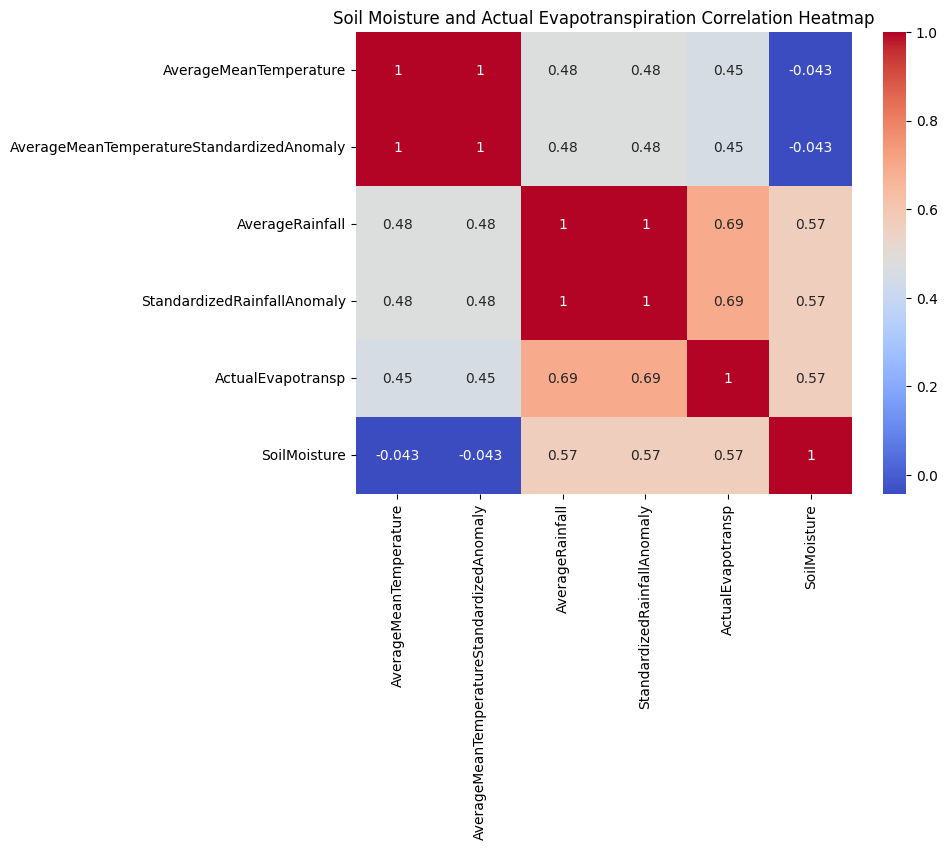

                                           AverageMeanTemperature  \
AverageMeanTemperature                                   1.000000   
AverageMeanTemperatureStandardizedAnomaly                0.999932   
AverageRainfall                                          0.476139   
StandardizedRainfallAnomaly                              0.476044   
ActualEvapotransp                                        0.453056   
SoilMoisture                                            -0.042518   

                                           AverageMeanTemperatureStandardizedAnomaly  \
AverageMeanTemperature                                                      0.999932   
AverageMeanTemperatureStandardizedAnomaly                                   1.000000   
AverageRainfall                                                             0.476013   
StandardizedRainfallAnomaly                                                 0.475918   
ActualEvapotransp                                                           

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date',
 'AverageMeanTemperature',
 'AverageMeanTemperatureStandardizedAnomaly',
 'AverageRainfall' ,
 'StandardizedRainfallAnomaly',
 'ActualEvapotransp',
 'SoilMoisture']

start_date = '1/1/1958'  # Specify the start date
end_date = '12/1/2021'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset_SoilET = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Set 'Date' column as the index
sub_dataset_SoilET.set_index('Date', inplace=True)

# Calculate the correlation matrix
SoilET_correlation_matrix = sub_dataset_SoilET.corr()

# Save the correlation matrix as an Excel file
SoilET_correlation_matrix.to_excel('SoilET_correlation_matrix.xlsx')

# Create a correlation heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(SoilET_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Soil Moisture and Actual Evapotranspiration Correlation Heatmap')
plt.savefig('SoilET_correlation_plot.jpg', dpi=300, bbox_inches='tight')
# plt.savefig('SoilET_correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the correlation matrix
print(SoilET_correlation_matrix)

### 4.3.3 Soil Moisture and Evapotranspiration Correlation Analysis with More featurs

This code performs a correlation analysis between soil moisture and evapotranspiration. It uses a dataset named 'data' and filters it based on specific column names and a date range. The correlation matrix is calculated and saved as an Excel file. A correlation heatmap plot is generated and saved as an image. The code displays the correlation matrix.

In [14]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'ActualEvapotransp', 'SoilMoisture', 'MaxTemp', 'SPI1', 'SPI3', 'PalmerDroughtSeverityIndex']
# start_date = '1/1/1958'  # Specify the start date
# end_date = '12/1/2021'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_SoilET = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Set 'Date' column as the index
# sub_dataset_SoilET.set_index('Date', inplace=True)

# # Calculate the correlation matrix
# SoilET_correlation_matrix = sub_dataset_SoilET.corr()

# # Save the correlation matrix as an Excel file
# filename = ('sub_dataset_SoilET_correlation_matrix_SPI_Palmer.xlsx')
# SoilET_correlation_matrix.to_excel(filename)

# # Create a correlation heatmap plot
# plt.figure(figsize=(8, 6))
# sns.heatmap(SoilET_correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap - Soil Moisture and Evapotranspiration')
# plt.xticks(rotation=45, ha='right')  # Incline the labels on the horizontal axis
# plt.savefig('sub_dataset_SoilET_correlation_plot_SPI_Palmer.jpg', dpi=300, bbox_inches='tight')
# # plt.savefig('sub_dataset_SoilET_correlation_plot_SPI_Palmer.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Display the correlation matrix
# print(SoilET_correlation_matrix)

## 4.4  Waterlogging and Return Period Analysis
Can we find the values Waterlogging and Return Period of thee Rainfall as a function of Temprature and Rainfall for the entire basin?

### 4.4.1  Waterlogging and Return Period Plot
This code analyzes and visualizes the relationship between waterlogging and return period using a dataset. It filters the dataset based on specified columns and date range. The waterlogging data is plotted on the primary y-axis, while the return period data is plotted on the secondary y-axis. The plot includes grid lines and x-axis labels showing the beginning of each year. The resulting plot is saved as PNG and JPG files for further use.

In [15]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'MaxTemp', 'Waterlogging', 'ReturnPeriod']
# start_date = '1/1/1958'  # Specify the start date
# end_date = '12/1/2021'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset_waterlogging = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset_waterlogging['Date'] = pd.to_datetime(sub_dataset_waterlogging['Date'])

# # Set 'Date' column as the index
# sub_dataset_waterlogging.set_index('Date', inplace=True)

# # Save the subdataset as an Excel file
# sub_dataset_waterlogging.to_excel("sub_dataset_waterlogging.xlsx", index=True)

# # Plotting the dataset
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plot Waterlogging
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Waterlogging (km²)')
# ax1.plot(sub_dataset_waterlogging.index, sub_dataset_waterlogging['Waterlogging'], marker='o', color='green')
# ax1.tick_params(axis='y', labelcolor='green')
# ax1.set_ylim(bottom=0)  # Set the y-axis minimum to 0

# # Create a second vertical axis for ReturnPeriod
# ax2 = ax1.twinx()
# ax2.set_ylabel('Return Period (year)')
# ax2.plot(sub_dataset_waterlogging.index, sub_dataset_waterlogging['ReturnPeriod'], marker='o', color='blue')
# ax2.tick_params(axis='y', labelcolor='blue')

# plt.title('Waterlogging and Return Period Data')
# plt.grid(True)

# # Set x-axis tick locator to show the beginning of each year
# ax1.xaxis.set_major_locator(mdates.YearLocator(base=5))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# # Rotate and align x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Save the plot as a high-quality PNG file
# plt.savefig('waterlogging_returnperiod_plot.png', dpi=300, bbox_inches='tight')

# # Save the plot as a high-quality JPG file
# plt.savefig('waterlogging_returnperiod_plot.jpg', dpi=300, bbox_inches='tight')

# # Display the plot
# plt.show()

### 4.4.2  Correlation Analysis and Heatmap Plot

This code performs correlation analysis and generates a correlation heatmap plot for selected columns from a dataset. It calculates the correlation matrix, saves it as an Excel file, and creates a heatmap plot with annotated correlation values. The plot is saved as JPG and PNG files, and the x-axis labels are rotated for better readability.

In [16]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The dataset is called 'data'
# column_names = ['Date', 'ChimpeniRainfall', 'MaxTemp', 'Waterlogging', 'ReturnPeriod']
# start_date = '1/1/1958'  # Specify the start date
# end_date = '12/1/2021'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Set 'Date' column as the index
# sub_dataset.set_index('Date', inplace=True)

# # Calculate the correlation matrix
# correlation_matrix = sub_dataset.corr()

# # Save the correlation matrix as an Excel file
# filename = 'sub_dataset_correlation_matrix_{}.xlsx'.format('_'.join(column_names))
# correlation_matrix.to_excel(filename)

# # Create a correlation heatmap plot
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.xticks(rotation=90)  # Rotate x-axis labels vertically
# plt.savefig('sub_dataset_correlation_plot_{}.jpg'.format('_'.join(column_names)), dpi=300, bbox_inches='tight')
# plt.savefig('sub_dataset_correlation_plot_{}.png'.format('_'.join(column_names)), dpi=300, bbox_inches='tight')
# plt.show()

# # Display the correlation matrix
# print(correlation_matrix)

## 4.5  Plotting Multiple Variable Pairs over Time


### 4.5.1  Plotting Multiple Variable Pairs over Time: Rainfall, Lake Area, NDVI, Lake Depth, Max Temp

This code plots multiple variable pairs over a specified time range. It compares variables such as 'LakeSurfaceArea' and 'NDVIArea', 'LakeDepth' and 'NDVIArea', and 'LakeSurfaceArea' and 'LakeDepth' on separate charts with dual vertical axes. The horizontal axis shows years, and vertical grid lines indicate months. The resulting plots are saved as PNG and JPG files.

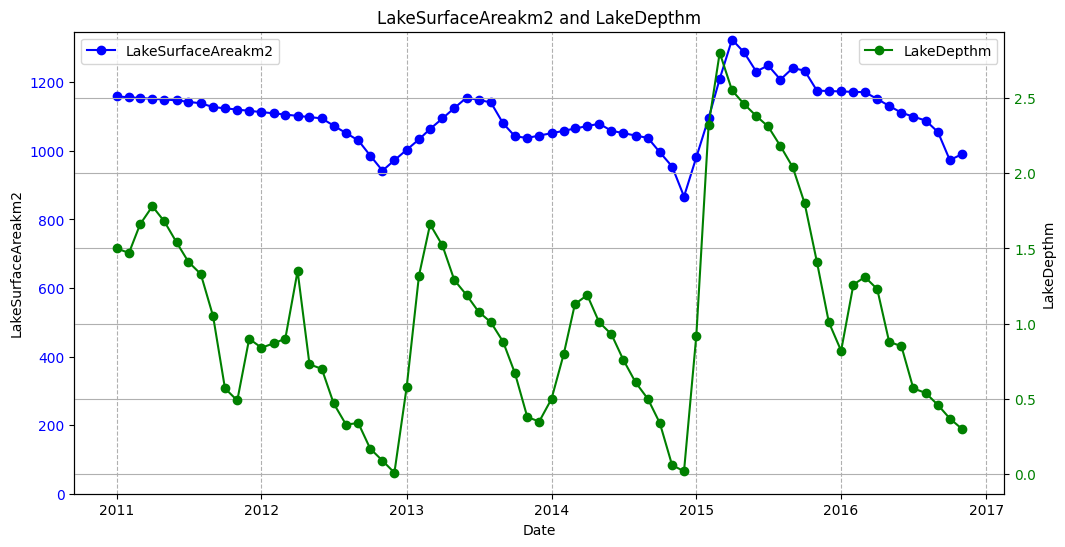

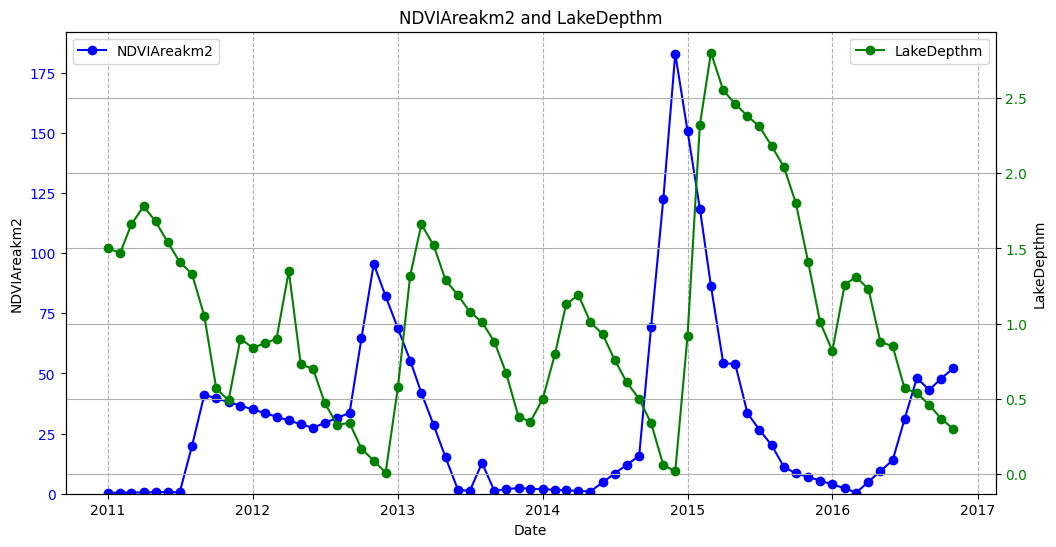

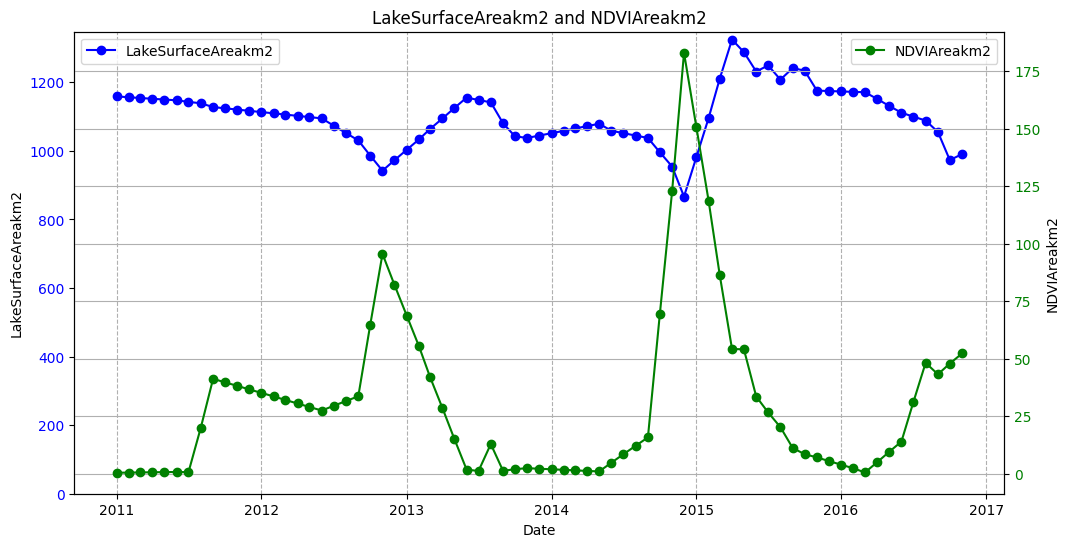

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# The dataset is called 'data'
column_names =['Date', 'LakeSurfaceAreakm2'  ,'NDVIAreakm2','LakeDepthm']
start_date = '1/1/2011'  # Specify the start date
end_date = '11/1/2016'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Convert 'Date' column to datetime type
sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# Set 'Date' column as the index
sub_dataset.set_index('Date', inplace=True)

# Plotting the datasets
pairs = [('LakeSurfaceAreakm2', 'LakeDepthm'), ('NDVIAreakm2', 'LakeDepthm'), ('LakeSurfaceAreakm2', 'NDVIAreakm2')]

# Save the subdataset as an Excel file
sub_dataset.to_excel("sub_dataset_LakeDepthAreaNDVI.xlsx", index=True)

for pair in pairs:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot first variable in the pair
    ax1.set_xlabel('Date')
    ax1.set_ylabel(pair[0])
    ax1.plot(sub_dataset.index, sub_dataset[pair[0]], marker='o', color='blue', label=pair[0])
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(bottom=0)  # Set the y-axis minimum to 0
    ax1.legend(loc='upper left')

    # Create a second vertical axis for second variable in the pair
    ax2 = ax1.twinx()
    ax2.set_ylabel(pair[1])
    ax2.plot(sub_dataset.index, sub_dataset[pair[1]], marker='o', color='green', label=pair[1])
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    # Add vertical grid lines on months
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.grid(axis='x', which='major', linestyle='--')

    plt.title(f'{pair[0]} and {pair[1]}')
    plt.grid(True)

    # Rotate and align x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Save the plot as a high-quality PNG file
    # plt.savefig(f'{pair[0]}_{pair[1]}_plot.png', dpi=300, bbox_inches='tight')

    # Save the plot as a high-quality JPG file
    plt.savefig(f'{pair[0]}_{pair[1]}_plot.jpg', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

### 4.5.2 Correlation Analysis: Rainfall, Lake Area, NDVI, Lake Depth, Max Temp

Summary: This analysis examines the correlation between rainfall, lake area, NDVI (Normalized Difference Vegetation Index), lake depth, and maximum temperature. The correlation is visualized using a heatmap, providing insights into the relationships between these variables.

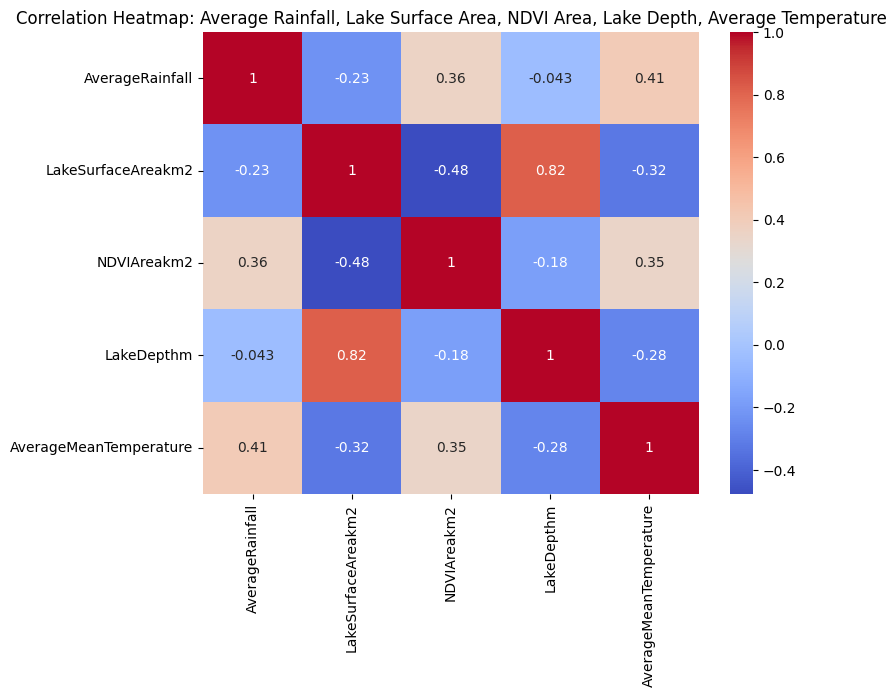

                        AverageRainfall  LakeSurfaceAreakm2  NDVIAreakm2  \
AverageRainfall                1.000000           -0.232309     0.357768   
LakeSurfaceAreakm2            -0.232309            1.000000    -0.477738   
NDVIAreakm2                    0.357768           -0.477738     1.000000   
LakeDepthm                    -0.042762            0.815763    -0.180166   
AverageMeanTemperature         0.409537           -0.323226     0.346606   

                        LakeDepthm  AverageMeanTemperature  
AverageRainfall          -0.042762                0.409537  
LakeSurfaceAreakm2        0.815763               -0.323226  
NDVIAreakm2              -0.180166                0.346606  
LakeDepthm                1.000000               -0.275808  
AverageMeanTemperature   -0.275808                1.000000  


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'AverageRainfall',  'LakeSurfaceAreakm2'  ,'NDVIAreakm2','LakeDepthm', 'AverageMeanTemperature']
start_date = '1/1/2011'  # Specify the start date
end_date = '11/1/2016'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Set 'Date' column as the index
sub_dataset.set_index('Date', inplace=True)

# Calculate the correlation matrix
correlation_matrix = sub_dataset.corr()

# Create a correlation heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Average Rainfall, Lake Surface Area, NDVI Area, Lake Depth, Average Temperature')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.savefig('sub_dataset_correlation_plot_{}.jpg'.format('_'.join(column_names)), dpi=300, bbox_inches='tight')
# plt.savefig('sub_dataset_correlation_plot_{}.png'.format('_'.join(column_names)), dpi=300, bbox_inches='tight')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

## 4.6  Disease Analysis

### 4.6.1  Comparison of Disease Incidents

This code generates two plots comparing the incidents of malnutrition and cholera in a specific time period. The first plot shows the correlation between new cases and inpatient deaths of malnutrition in all districts. The second plot depicts the relationship between the cases and deaths caused by cholera in all districts. The plots provide visual insights into the dynamics of these diseases during the specified time frame.

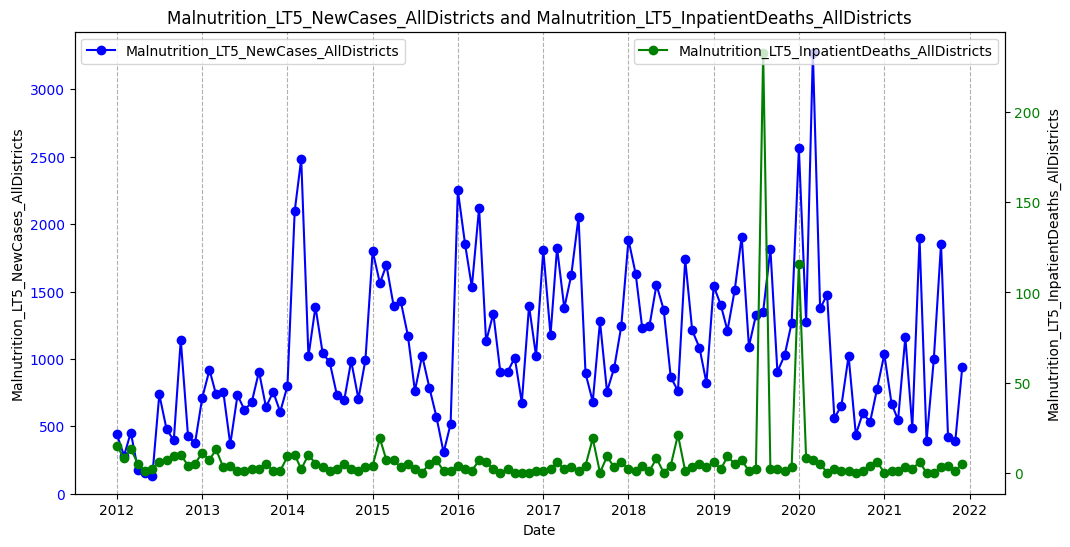

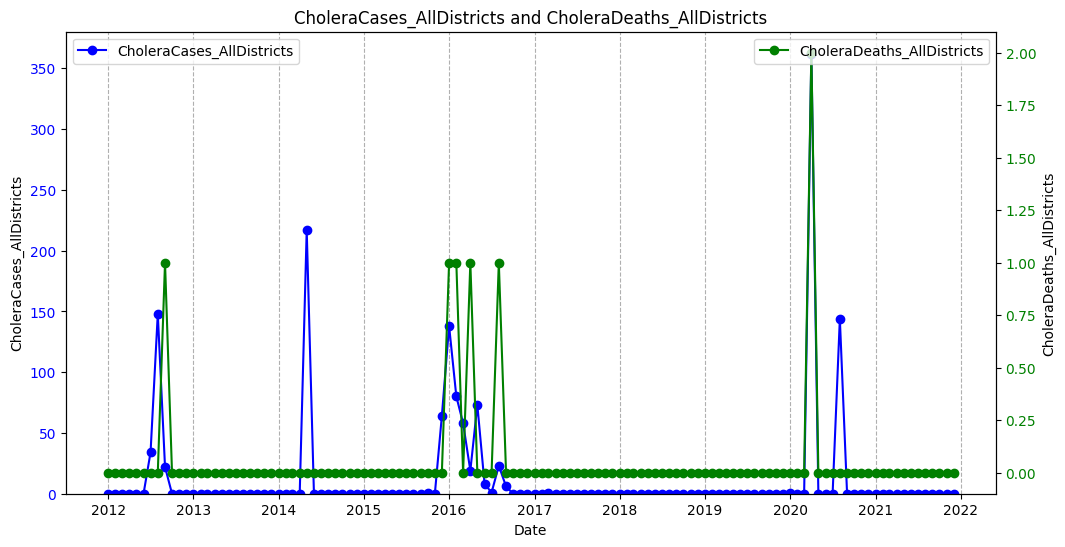

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'CholeraCases_AllDistricts', 'CholeraDeaths_AllDistricts', 'Malnutrition_LT5_NewCases_AllDistricts', 'Malnutrition_LT5_InpatientDeaths_AllDistricts']
start_date = '1/1/2012'  # Specify the start date
end_date = '12/1/2021'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Convert 'Date' column to datetime type
sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# Set 'Date' column as the index
sub_dataset.set_index('Date', inplace=True)

# Plotting the datasets
pairs = [('Malnutrition_LT5_NewCases_AllDistricts', 'Malnutrition_LT5_InpatientDeaths_AllDistricts'),
         ('CholeraCases_AllDistricts', 'CholeraDeaths_AllDistricts')]

for pair in pairs:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot first variable in the pair
    ax1.set_xlabel('Date')
    ax1.set_ylabel(pair[0])
    ax1.plot(sub_dataset.index, sub_dataset[pair[0]], marker='o', color='blue', label=pair[0])
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_ylim(bottom=0)  # Set the y-axis minimum to 0
    ax1.legend(loc='upper left')

    # Create a second vertical axis for second variable in the pair
    ax2 = ax1.twinx()
    ax2.set_ylabel(pair[1])
    ax2.plot(sub_dataset.index, sub_dataset[pair[1]], marker='o', color='green', label=pair[1])
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    ax1.grid(axis='x', linestyle='--')  # Add vertical grid lines on months

    plt.title(f'{pair[0]} and {pair[1]}')

    # Rotate and align x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Save the plot as a high-quality PNG file
    plt.savefig(f'{pair[0]}_{pair[1]}_plot.png', dpi=300, bbox_inches='tight')

    # Save the plot as a high-quality JPG file
    plt.savefig(f'{pair[0]}_{pair[1]}_plot.jpg', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

### 4.6.2  Plotting Diarrhoea and Schistosomiasis Cases in Different Districts

This code generates plots for the columns related to Diarrhoea Cases and Schistosomiasis Cases in different districts. It filters the data based on a specified date range, converts the 'Date' column to datetime type, and sets it as the index. It then plots the Diarrhoea Cases and Schistosomiasis Cases using line plots, customizes the plots with labels, titles, legends, and gridlines, and saves the plots as PNG files. Additionally, it saves the corresponding data for each plot as separate Excel files.

In [33]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # The dataset is called 'data'
# column_names = ['Date', 'DiarrhoeaCases_Machinga', 'DiarrhoeaCases_Zomba', 'DiarrhoeaCases_Phalombe',
#                 'DiarrhoeaCases_AllDistricts', 'SchistosomiasisCases_Machinga', 'SchistosomiasisCases_Zomba',
#                 'SchistosomiasisCases_Phalombe', 'SchistosomiasisCases_AllDistricts']
# start_date = '1/1/2017'  # Specify the start date
# end_date = '12/1/2022'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# # Set 'Date' column as the index
# sub_dataset.set_index('Date', inplace=True)

# # Plotting the datasets
# diarrhoea_columns = ['DiarrhoeaCases_Machinga', 'DiarrhoeaCases_Zomba', 'DiarrhoeaCases_Phalombe',
#                      'DiarrhoeaCases_AllDistricts']
# schistosomiasis_columns = ['SchistosomiasisCases_Machinga', 'SchistosomiasisCases_Zomba',
#                            'SchistosomiasisCases_Phalombe', 'SchistosomiasisCases_AllDistricts']

# # Plotting Diarrhoea Cases
# plt.figure(figsize=(12, 6))
# for column in diarrhoea_columns:
#     plt.plot(sub_dataset.index, sub_dataset[column], marker='o', label=column)

# plt.xlabel('Date')
# plt.ylabel('Diarrhoea Cases')
# plt.title('Diarrhoea Cases in Different Districts')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45, ha='right')

# # Save the Diarrhoea Cases plot
# plt.savefig('diarrhoea_cases_plot.png', dpi=300, bbox_inches='tight')

# # Save the Diarrhoea Cases data as an Excel file
# sub_dataset[diarrhoea_columns].to_excel('diarrhoea_cases_data.xlsx', index=True)


# # Plotting Schistosomiasis Cases
# plt.figure(figsize=(12, 6))
# for column in schistosomiasis_columns:
#     plt.plot(sub_dataset.index, sub_dataset[column], marker='o', label=column)

# plt.xlabel('Date')
# plt.ylabel('Schistosomiasis Cases')
# plt.title('Schistosomiasis Cases in Different Districts')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45, ha='right')

# # Save the Schistosomiasis Cases plot
# plt.savefig('schistosomiasis_cases_plot.png', dpi=300, bbox_inches='tight')

# # Save the Schistosomiasis Cases data as an Excel file
# sub_dataset[schistosomiasis_columns].to_excel('schistosomiasis_cases_data.xlsx', index=True)

# # Show the plots
# plt.show()

### 4.6.3 Plotting Cholera, Malaria, Diarrhea, and Diarrhoea Cases in Zomba District

This code generates plots for the columns related to Cholera Cases, Malaria Cases, Diarrhea Cases, and Diarrhoea Cases in Zomba District. It filters the data based on a specified date range, converts the 'Date' column to datetime type, and sets it as the index. It then plots the respective cases using line plots, customizes the plots with labels, titles, legends, and gridlines, and saves the plots as PNG files. Additionally, it saves the corresponding data for each plot as separate Excel files

In [34]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # The dataset is called 'data'
# column_names = ['Date', 'CholeraCasesDOH_Zomba', 'MalariaCasesDOH_Zomba', 'DiarrheaCasesDOH_Zomba', 'DiarrhoeaCases_Zomba', 'CholeraCases_AllDistricts']
# start_date = '1/1/2015'  # Specify the start date
# end_date = '12/1/2019'  # Specify the end date

# # Remove leading and trailing spaces from column names
# column_names = [column.strip() for column in column_names]

# # Filter the data based on the column names and date range
# sub_dataset = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# # Convert 'Date' column to datetime type
# sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# # Set 'Date' column as the index
# sub_dataset.set_index('Date', inplace=True)

# # Plotting the datasets
# cholera_doh_zomba_column = 'CholeraCasesDOH_Zomba'
# cholera_all_districts_column = 'CholeraCases_AllDistricts'
# diarrhea_column = 'DiarrheaCasesDOH_Zomba'
# diarrhoea_column = 'DiarrhoeaCases_Zomba'

# # Plotting Cholera Cases
# plt.figure(figsize=(12, 6))
# plt.plot(sub_dataset.index, sub_dataset[cholera_doh_zomba_column], marker='o', label='Cholera Cases DOH')
# plt.plot(sub_dataset.index, sub_dataset[cholera_all_districts_column], marker='o', label='Cholera Cases All Districts')

# plt.xlabel('Date')
# plt.ylabel('Number of Cases')
# plt.title('Cholera Cases in Zomba District')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45, ha='right')

# # Save the Cholera Cases plot
# plt.savefig('cholera_cases_zomba_plot.png', dpi=300, bbox_inches='tight')

# # Save the Cholera Cases data as an Excel file
# sub_dataset[[cholera_doh_zomba_column, cholera_all_districts_column]].to_excel('cholera_cases_zomba_data.xlsx', index=True)

# # Plotting Malaria Cases
# plt.figure(figsize=(12, 6))
# plt.plot(sub_dataset.index, sub_dataset['MalariaCasesDOH_Zomba'], marker='o', label='Malaria Cases')

# plt.xlabel('Date')
# plt.ylabel('Number of Cases')
# plt.title('Malaria Cases in Zomba District')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45, ha='right')

# # Save the Malaria Cases plot
# plt.savefig('malaria_cases_zomba_plot.png', dpi=300, bbox_inches='tight')

# # Save the Malaria Cases data as an Excel file
# sub_dataset['MalariaCasesDOH_Zomba'].to_excel('malaria_cases_zomba_data.xlsx', index=True)


# # Plotting Diarrhea Cases
# plt.figure(figsize=(12, 6))
# plt.plot(sub_dataset.index, sub_dataset[diarrhea_column], marker='o', label='Diarrhea Cases DOH')
# plt.plot(sub_dataset.index, sub_dataset[diarrhoea_column], marker='o', label='Diarrhoea Cases')

# plt.xlabel('Date')
# plt.ylabel('Number of Cases')
# plt.title('Diarrhea Cases in Zomba District')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45, ha='right')

# # Save the Diarrhea Cases plot
# plt.savefig('diarrhea_cases_zomba_plot.png', dpi=300, bbox_inches='tight')

# # Save the Diarrhea Cases data as an Excel file
# sub_dataset[[diarrhea_column, diarrhoea_column]].to_excel('diarrhea_cases_zomba_data.xlsx', index=True)

# # Show the plots
# plt.show()


### 4.6.4 Diarrhea Cases Prediction Using Decision Trees and Random Forests

This code implements a prediction model for diarrhea cases using decision tree regressors and random forest regressors. It filters and cleans the dataset, splits it into training and testing sets, trains the models, and evaluates their performance. Additionally, it visualizes the decision tree, plots feature importances, and generates rules for both models. The code also saves various outputs, such as Excel files for data, training/testing sets, and evaluation metrics.

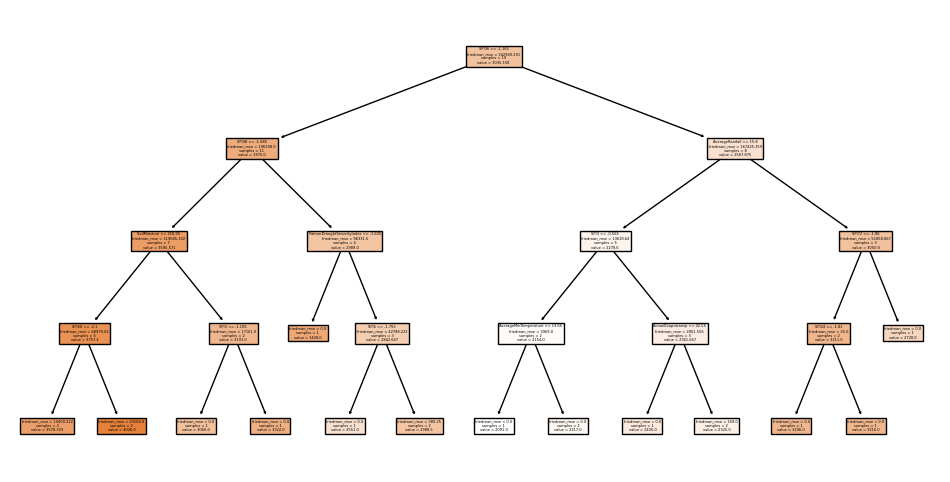

Decision Tree Model Performance:
Mean Squared Error: 1510515.95
Root Mean Squared Error: 1229.0304918918814
R2 Score: -0.5302405052745076
Random Forest Model Performance:
Mean Squared Error: 1426836.7831412
Root Mean Squared Error: 1194.5027346729685
R2 Score: -0.44546864267023656


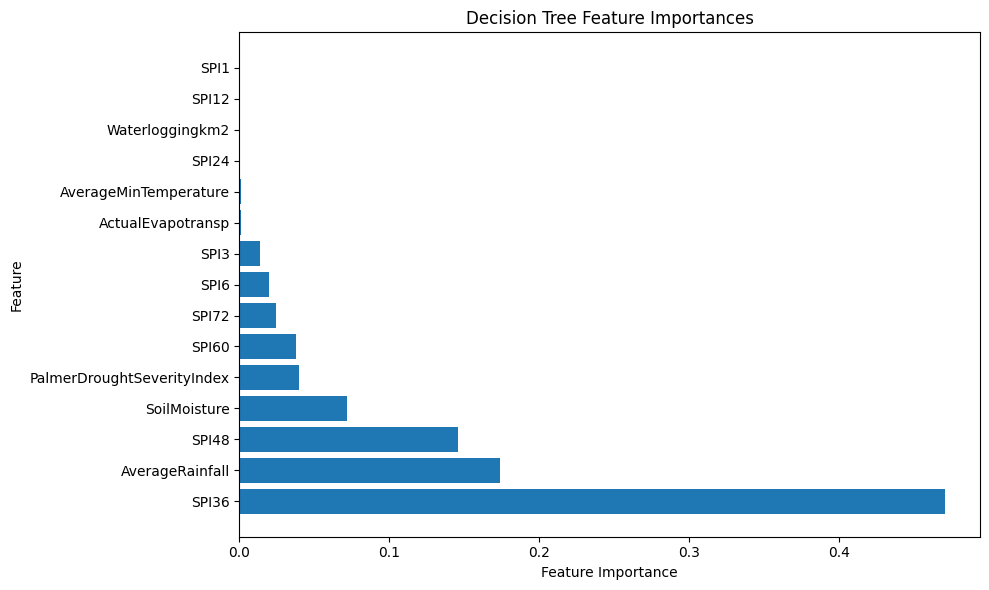

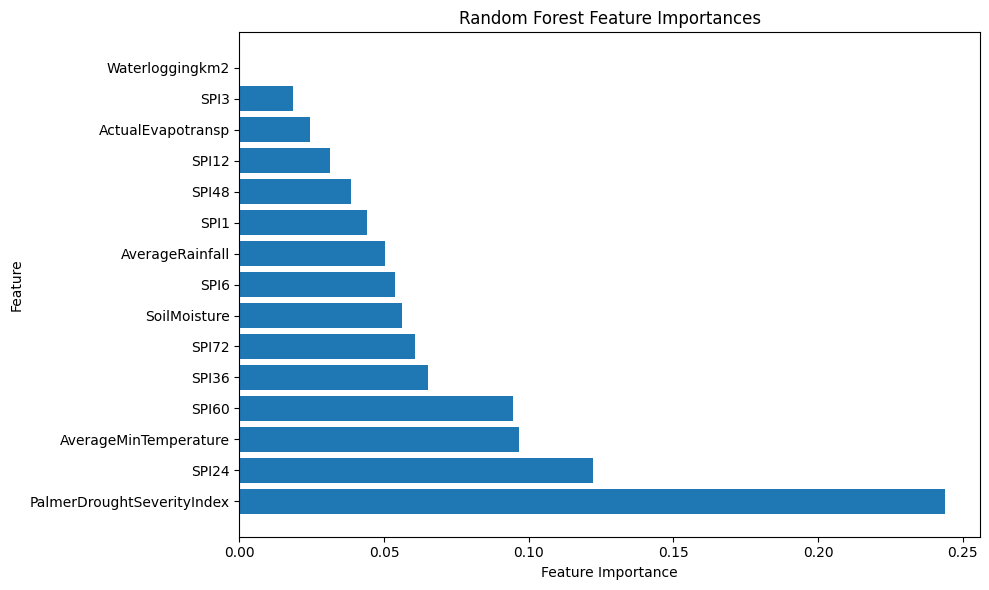

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'AverageRainfall', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
    'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterloggingkm2',
    'AverageMinTemperature',
    'PalmerDroughtSeverityIndex',
    'DiarrhoeaCases_AllDistricts',
    'SchistosomiasisCases_AllDistricts',
]  # Specify the desired column names

start_date = '2017-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# Save the filtered data as Excel
sub_dataset.to_excel('filtered_data.xlsx', index=False)

# Drop rows with missing values
sub_dataset.dropna(inplace=True)

# Save the cleaned data as Excel
sub_dataset.to_excel('cleaned_data.xlsx', index=False)

# Extract the features
features = sub_dataset[
    [
        'AverageRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
        'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterloggingkm2',
        'AverageMinTemperature', 'PalmerDroughtSeverityIndex'
    ]
]

# Extract the target variable
target = sub_dataset['DiarrhoeaCases_AllDistricts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create a decision tree regressor with max_depth=4 and criterion='friedman_mse'
decision_tree_regressor = DecisionTreeRegressor(max_depth=4, criterion='friedman_mse')

# Fit the decision tree regressor to the training data
decision_tree_regressor.fit(X_train, y_train)

# Create a random forest regressor with n_estimators=100 and max_depth=6
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

# Fit the random forest regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Get feature importances from the decision tree regressor
decision_tree_importances = decision_tree_regressor.feature_importances_

# Sort feature importances in descending order for decision tree
decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

# Get the names of the features in descending order of importance for decision tree
decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

# Get feature importances from the random forest regressor
random_forest_importances = random_forest_regressor.feature_importances_

# Sort feature importances in descending order for random forest
random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

# Get the names of the features in descending order of importance for random forest
random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
plt.savefig('decision_tree_diarrhea_cases.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.savefig('decision_tree_feature_importance.png')

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png')

# Generate rules as Python function code for decision tree
decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
decision_tree_rules_text = "def predict_diarrhea_cases_decision_tree(\n"
decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
decision_tree_rules_text += "\t# Decision Rules:\n"
decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

# Save rules as Python function code in a text file for decision tree
with open('diarrhea_cases_rules_decision_tree.py', 'w') as file:
    file.write(decision_tree_rules_text)

# Generate rules as Python function code for random forest
random_forest_rules_text = "def predict_diarrhea_cases_random_forest(\n"
random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
random_forest_rules_text += "\t# Decision Rules:\n"
random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

# Save rules as Python function code in a text file for random forest
with open('diarrhea_cases_rules_random_forest.py', 'w') as file:
    file.write(random_forest_rules_text)

# Save the training and testing sets as Excel
X_train.to_excel('X_train.xlsx', index=False)
X_test.to_excel('X_test.xlsx', index=False)
y_train.to_excel('y_train.xlsx', index=False)
y_test.to_excel('y_test.xlsx', index=False)

# Make predictions on the testing set using decision tree regressor
y_pred_decision_tree = decision_tree_regressor.predict(X_test)

# Make predictions on the testing set using random forest regressor
y_pred_random_forest = random_forest_regressor.predict(X_test)

# Evaluate decision tree model performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Evaluate random forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics for decision tree model
print("Decision Tree Model Performance:")
print("Mean Squared Error:", mse_decision_tree)
print("Root Mean Squared Error:", rmse_decision_tree)
print("R2 Score:", r2_decision_tree)

# Print the evaluation metrics for random forest model
print("Random Forest Model Performance:")
print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("R2 Score:", r2_random_forest)


### 4.6.5 Analysis of Schistosomiasis Cases and Predictive Modeling

Summary:
This code performs an analysis of Schistosomiasis cases using historical data and builds predictive models using Decision Tree Regressor and Random Forest Regressor. It includes data preprocessing, feature extraction, visualization of decision tree, feature importance plots, and evaluation metrics for the models. The code generates relevant charts and saves them as image files. The output provides a concise summary of the evaluation metrics for both models.

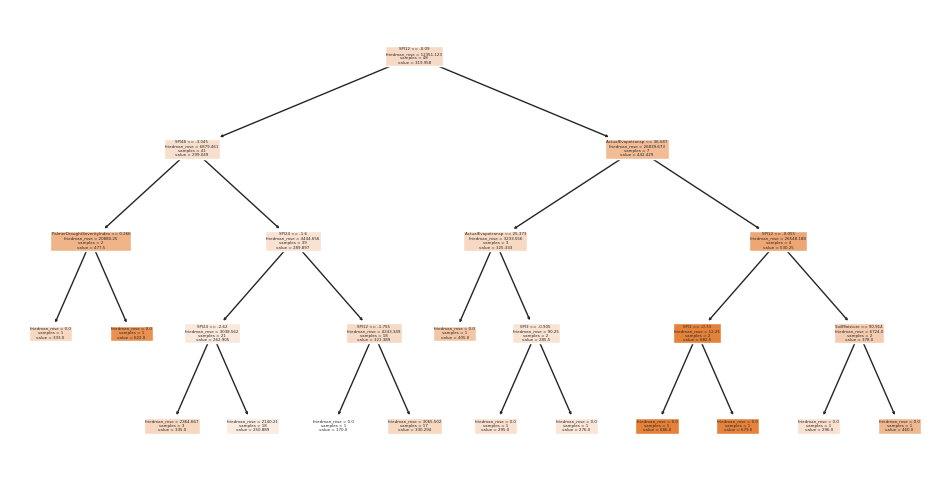

Evaluation metrics for Decision Tree Regressor:
Mean Squared Error (MSE): 12104.112499466019
Coefficient of Determination (R^2 score): -0.40036266576504187

Evaluation metrics for Random Forest Regressor:
Mean Squared Error (MSE): 6898.775943725108
Coefficient of Determination (R^2 score): 0.20185901514903892


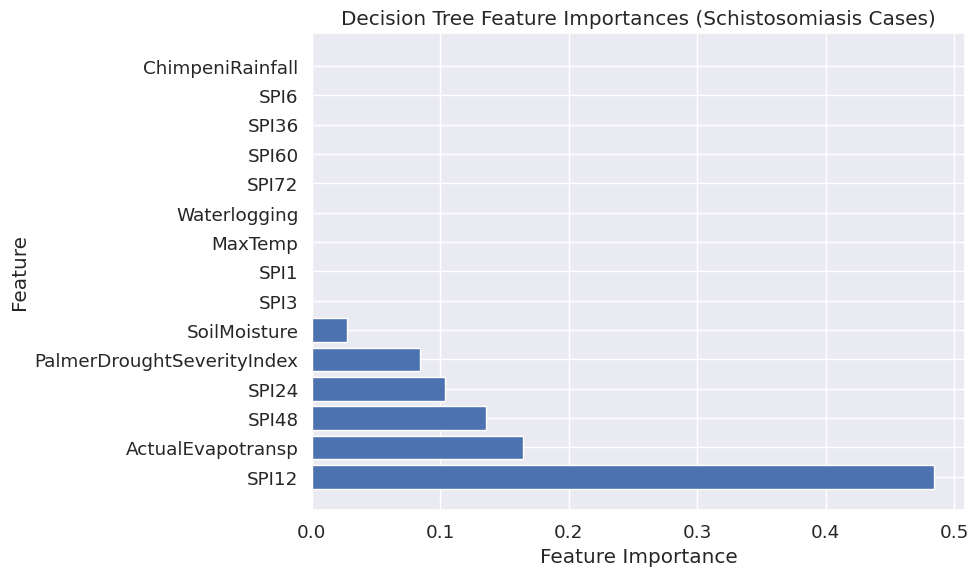

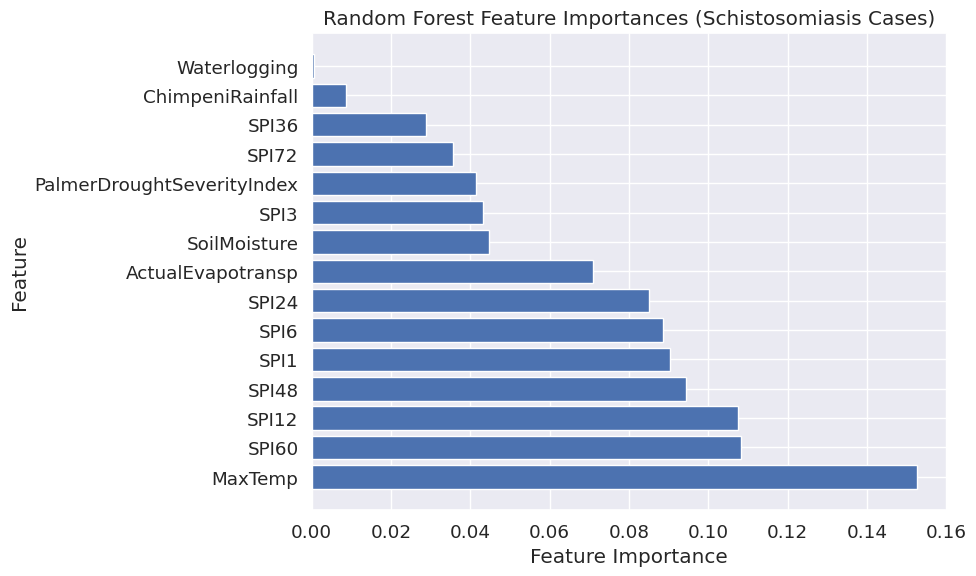

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'ChimpeniRainfall', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
    'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterlogging',
    'MaxTemp',
    'PalmerDroughtSeverityIndex',
    'DiarrhoeaCases_AllDistricts',
    'SchistosomiasisCases_AllDistricts',
]  # Specify the desired column names

start_date = '2017-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# Save the filtered data as Excel
sub_dataset.to_excel('filtered_data.xlsx', index=False)

# Drop rows with missing values
sub_dataset.dropna(inplace=True)

# Save the cleaned data as Excel
sub_dataset.to_excel('cleaned_data.xlsx', index=False)

# Extract the features
features = sub_dataset[
    [
        'ChimpeniRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
        'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterlogging',
        'MaxTemp', 'PalmerDroughtSeverityIndex'
    ]
]

# Extract the target variable
target = sub_dataset['SchistosomiasisCases_AllDistricts']

# Check the number of available samples
num_samples = len(features)

if num_samples == 0:
    print("Insufficient samples after dropping missing values.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )

    # Create a decision tree regressor with max_depth=4 and criterion='friedman_mse'
    decision_tree_regressor = DecisionTreeRegressor(max_depth=4, criterion='friedman_mse')

    # Fit the decision tree regressor to the training data
    decision_tree_regressor.fit(X_train, y_train)

    # Create a random forest regressor with n_estimators=100 and max_depth=6
    random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

    # Fit the random forest regressor to the training data
    random_forest_regressor.fit(X_train, y_train)

    # Get feature importances from the decision tree regressor
    decision_tree_importances = decision_tree_regressor.feature_importances_

    # Sort feature importances in descending order for decision tree
    decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
    decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

    # Get the names of the features in descending order of importance for decision tree
    decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

    # Get feature importances from the random forest regressor
    random_forest_importances = random_forest_regressor.feature_importances_

    # Sort feature importances in descending order for random forest
    random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
    random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

    # Get the names of the features in descending order of importance for random forest
    random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

    # Visualize the decision tree using plot_tree
    plt.figure(figsize=(12, 6))
    plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
    plt.savefig('decision_tree_schistosomiasis_cases.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot feature importances for decision tree
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
    plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Decision Tree Feature Importances (Schistosomiasis Cases)')
    plt.tight_layout()
    plt.savefig('decision_tree_feature_importance_schistosomiasis_cases.png')

    # Plot feature importances for random forest
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
    plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importances (Schistosomiasis Cases)')
    plt.tight_layout()
    plt.savefig('random_forest_feature_importance_schistosomiasis_cases.png')

    # Generate rules as Python function code for decision tree
    decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
    decision_tree_rules_text = "def predict_schistosomiasis_cases_decision_tree(\n"
    decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
    decision_tree_rules_text += "\t# Decision Rules:\n"
    decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

    # Save rules as Python function code in a text file for decision tree
    with open('schistosomiasis_cases_rules_decision_tree.py', 'w') as file:
        file.write(decision_tree_rules_text)

    # Generate rules as Python function code for random forest
    random_forest_rules_text = "def predict_schistosomiasis_cases_random_forest(\n"
    random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
    random_forest_rules_text += "\t# Decision Rules:\n"
    random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

    # Save rules as Python function code in a text file for random forest
    with open('schistosomiasis_cases_rules_random_forest.py', 'w') as file:
        file.write(random_forest_rules_text)

    # Save the training and testing sets as Excel
    X_train.to_excel('X_train_schistosomiasis_cases.xlsx', index=False)
    y_train.to_excel('y_train_schistosomiasis_cases.xlsx', index=False)
    X_test.to_excel('X_test_schistosomiasis_cases.xlsx', index=False)
    y_test.to_excel('y_test_schistosomiasis_cases.xlsx', index=False)

    # Make predictions using the decision tree regressor
    y_pred_decision_tree = decision_tree_regressor.predict(X_test)

    # Calculate mean squared error and coefficient of determination (R^2 score) for decision tree
    mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
    r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

    # Print evaluation metrics for decision tree
    print("Evaluation metrics for Decision Tree Regressor:")
    print("Mean Squared Error (MSE):", mse_decision_tree)
    print("Coefficient of Determination (R^2 score):", r2_decision_tree)

    # Make predictions using the random forest regressor
    y_pred_random_forest = random_forest_regressor.predict(X_test)

    # Calculate mean squared error and coefficient of determination (R^2 score) for random forest
    mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
    r2_random_forest = r2_score(y_test, y_pred_random_forest)

    # Print evaluation metrics for random forest
    print("\nEvaluation metrics for Random Forest Regressor:")
    print("Mean Squared Error (MSE):", mse_random_forest)
    print("Coefficient of Determination (R^2 score):", r2_random_forest)

### 4.6.6 Cholera Cases Prediction Using Decision Trees and Random Forests -----------

This code implements a prediction model for Cholera cases using decision tree regressors and random forest regressors. It filters and cleans the dataset, splits it into training and testing sets, trains the models, and evaluates their performance. Additionally, it visualizes the decision tree, plots feature importances, and generates rules for both models. The code also saves various outputs, such as Excel files for data, training/testing sets, and evaluation metrics.

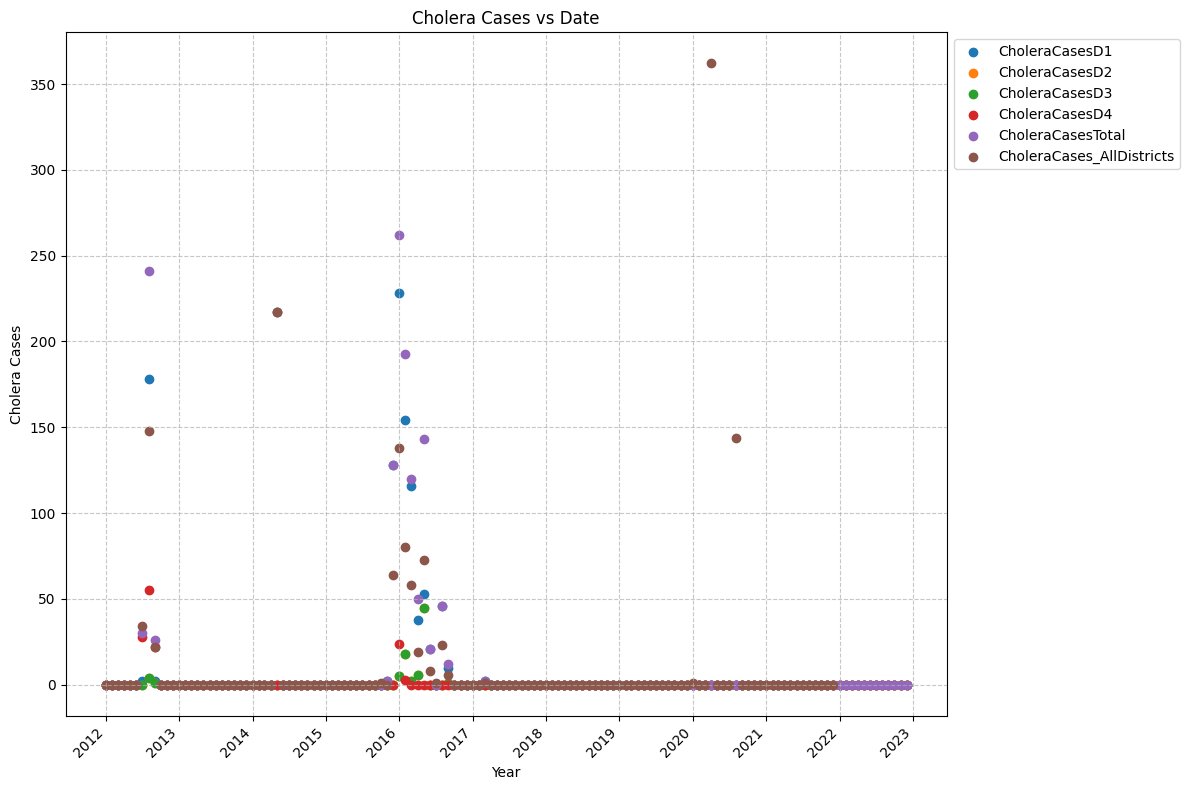

Selected Target Features:
Index(['CholeraCasesTotal'], dtype='object')
            CholeraCasesTotal
Year Month                   
2012 1                    0.0
     2                    0.0
     3                    0.0
     4                    0.0
     5                    0.0
...                       ...
2021 8                    0.0
     9                    0.0
     10                   0.0
     11                   0.0
     12                   0.0

[120 rows x 1 columns]


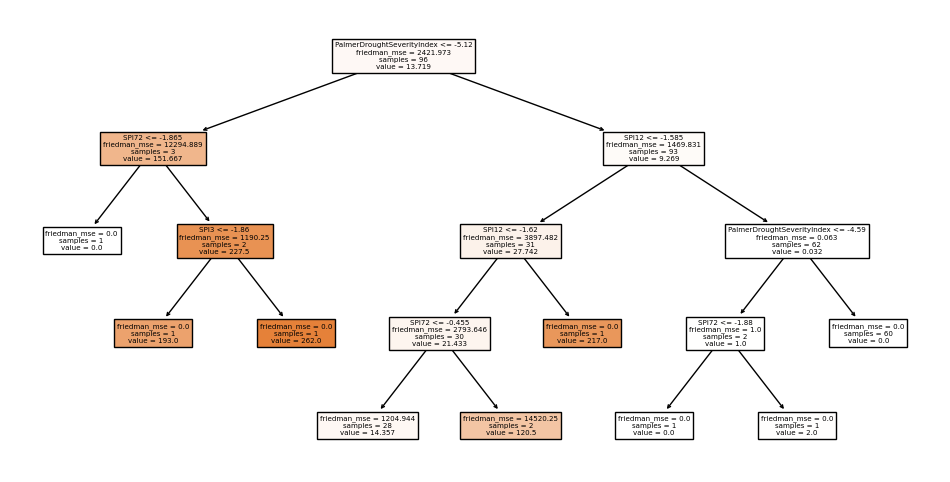

Decision Tree Model Performance:
Mean Squared Error: 3710.3401360544217
Root Mean Squared Error: 60.912561397912185
R2 Score: -4.173208555304384
Random Forest Model Performance:
Mean Squared Error: 838.8987364321192
Root Mean Squared Error: 28.963748659869964
R2 Score: -0.16964967124540253


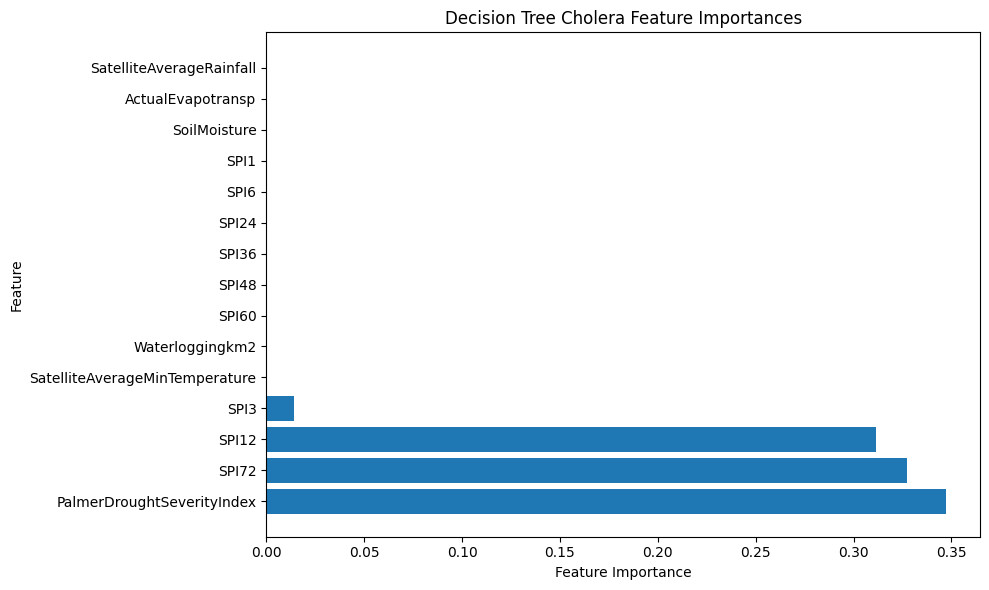

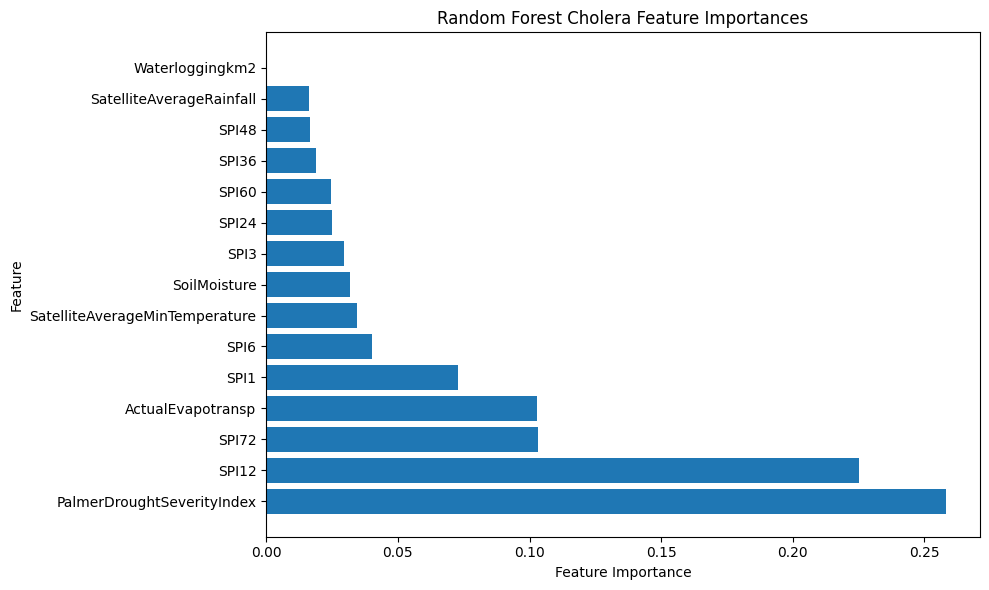

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'SatelliteAverageMinTemperature', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
    'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
    'SatelliteAverageRainfall',
    'PalmerDroughtSeverityIndex',
    'CholeraCasesD1' ,'CholeraCasesD2' ,'CholeraCasesD3', 'CholeraCasesD4',
    'CholeraCasesTotal',
    'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2', 'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
    'SchistosomiasisCasesTotal',
    'MalariaCasesD1', 'MalariaCasesD2', 'MalariaCasesD3', 'MalariaCasesD4',
    'MalariaCasesTotal',
    'MosquitoNetsCasesD1' ,'MosquitoNetsCasesD2','MosquitoNetsCasesD3','MosquitoNetsCasesD4',
    'MosquitoNetsCasesTotal',
    'CholeraCases_AllDistricts', 'CholeraDeaths_AllDistricts',
    'Malnutrition_LT5_NewCases_AllDistricts',
    'Malnutrition_LT5_InpatientDeaths_AllDistricts', 'DiarrhoeaCases_Machinga',
    'DiarrhoeaCases_Zomba', 'DiarrhoeaCases_Phalombe',
    'DiarrhoeaCases_AllDistricts', 'SchistosomiasisCases_Machinga',
    'SchistosomiasisCases_Zomba', 'SchistosomiasisCases_Phalombe',
    'SchistosomiasisCases_AllDistricts' ,'CholeraCasesDOH_Zomba',
    'MalariaCasesDOH_Zomba', 'DiarrheaCasesDOH_Zomba',
]  # Specify the desired column names

start_date = '2012-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# start_date = '2015-11-01'  # Specify the start date
# end_date = '2016-09-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# # Drop rows with missing values
# sub_dataset.dropna(inplace=True)

# Extract the features
features = sub_dataset[
    [
        'SatelliteAverageRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
        'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
        'SatelliteAverageMinTemperature', 'PalmerDroughtSeverityIndex'
    ]
]
#-------------------------------------------------
# Plot selected features vs. date
# Filter the data based on the column names and date range
sub_datasetplot = data.loc[
    (data['Date'] >= '2012-01-01') & (data['Date'] <= '2022-12-01'), column_names
]

plt.figure(figsize=(12, 8))

for feature in [
    'CholeraCasesD1' ,'CholeraCasesD2' ,'CholeraCasesD3', 'CholeraCasesD4',
    'CholeraCasesTotal', 'CholeraCases_AllDistricts',
]:
    plt.scatter(sub_datasetplot['Date'], sub_datasetplot[feature], label=feature, marker='o')

plt.xlabel('Year')
plt.ylabel('Cholera Cases')
plt.title('Cholera Cases vs Date')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# plt.xlabel('Date')
# plt.ylabel('CholeraCases')
# plt.title('CholeraCases vs Date')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()

# Save the figure in high-resolution JPG format
plt.savefig('CholeraCases_vs_date.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# plt.scatter(sub_dataset['Date'], sub_dataset[feature], label=feature, marker='o')

# plt.xlabel('Month')
# plt.ylabel('Feature Values')
# plt.title('Selected Features vs Month')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=45, ha='right', ticks=sub_dataset['Date'].unique())
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()

# Print the selected features
targetfeatures = sub_dataset[['CholeraCasesTotal']]
print("Selected Target Features:")
print(targetfeatures.columns)
print(targetfeatures)
#-------------------------------------------------
# Extract the target variable
target = sub_dataset['CholeraCasesTotal']

# Ensure the 'Date' column is in datetime format
sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# Sort the DataFrame based on the 'Date' column
sub_dataset.sort_values(by='Date', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create a decision tree regressor with max_depth=4 and criterion='friedman_mse'
decision_tree_regressor = DecisionTreeRegressor(max_depth=4, criterion='friedman_mse')

# Fit the decision tree regressor to the training data
decision_tree_regressor.fit(X_train, y_train)

# Create a random forest regressor with n_estimators=100 and max_depth=6
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

# Fit the random forest regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Get feature importances from the decision tree regressor
decision_tree_importances = decision_tree_regressor.feature_importances_

# Sort feature importances in descending order for decision tree
decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

# Get the names of the features in descending order of importance for decision tree
decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

# Get feature importances from the random forest regressor
random_forest_importances = random_forest_regressor.feature_importances_

# Sort feature importances in descending order for random forest
random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

# Get the names of the features in descending order of importance for random forest
random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
plt.savefig('CholeraCasesTotal.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Cholera Feature Importances')
plt.tight_layout()
plt.savefig('decision_tree_Cholera_feature_importance.png')

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Cholera Feature Importances')
plt.tight_layout()
plt.savefig('random_forest_Cholera_feature_importance.png')

# Generate rules as Python function code for decision tree
decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
decision_tree_rules_text = "def predict_Cholera_cases_decision_tree(\n"
decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
decision_tree_rules_text += "\t# Cholera Decision Rules:\n"
decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

# Save rules as Python function code in a text file for decision tree
with open('Cholera_cases_rules_decision_tree.py', 'w') as file:
    file.write(decision_tree_rules_text)

# Generate rules as Python function code for random forest
random_forest_rules_text = "def predict_Cholera_cases_random_forest(\n"
random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
random_forest_rules_text += "\t# Decision Rules:\n"
random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

# Save rules as Python function code in a text file for random forest
with open('Cholera_cases_rules_random_forest.py', 'w') as file:
    file.write(random_forest_rules_text)

# # Save the training and testing sets as Excel
# X_train.to_excel('X_train.xlsx', index=False)
# X_test.to_excel('X_test.xlsx', index=False)
# y_train.to_excel('y_train.xlsx', index=False)
# y_test.to_excel('y_test.xlsx', index=False)

# Make predictions on the testing set using decision tree regressor
y_pred_decision_tree = decision_tree_regressor.predict(X_test)

# Make predictions on the testing set using random forest regressor
y_pred_random_forest = random_forest_regressor.predict(X_test)

# Evaluate decision tree model performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Evaluate random forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics for decision tree model
print("Decision Tree Model Performance:")
print("Mean Squared Error:", mse_decision_tree)
print("Root Mean Squared Error:", rmse_decision_tree)
print("R2 Score:", r2_decision_tree)

# Print the evaluation metrics for random forest model
print("Random Forest Model Performance:")
print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("R2 Score:", r2_random_forest)

# Show the plot
plt.show()

# Get feature importances from the decision tree regressor
decision_tree_importances = decision_tree_regressor.feature_importances_

# Sort feature importances in descending order for decision tree
decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

# Get the names of the features in descending order of importance for decision tree
decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

# Get feature importances from the random forest regressor
random_forest_importances = random_forest_regressor.feature_importances_

# Sort feature importances in descending order for random forest
random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

# Get the names of the features in descending order of importance for random forest
random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

# Save feature importances to Excel
feature_importance_df = pd.DataFrame({
    'Feature': decision_tree_sorted_feature_names,
    'Decision_Tree_Importance': decision_tree_sorted_importances,
    'Random_Forest_Importance': random_forest_sorted_importances
})

feature_importance_df.to_excel('feature_importance_analysis.xlsx', index=False)


### 4.6.7 Malaria Cases Prediction Using Decision Trees and Random Forests -----------

This code implements a prediction model for Malaria cases using decision tree regressors and random forest regressors. It filters and cleans the dataset, splits it into training and testing sets, trains the models, and evaluates their performance. Additionally, it visualizes the decision tree, plots feature importances, and generates rules for both models. The code also saves various outputs, such as Excel files for data, training/testing sets, and evaluation metrics.

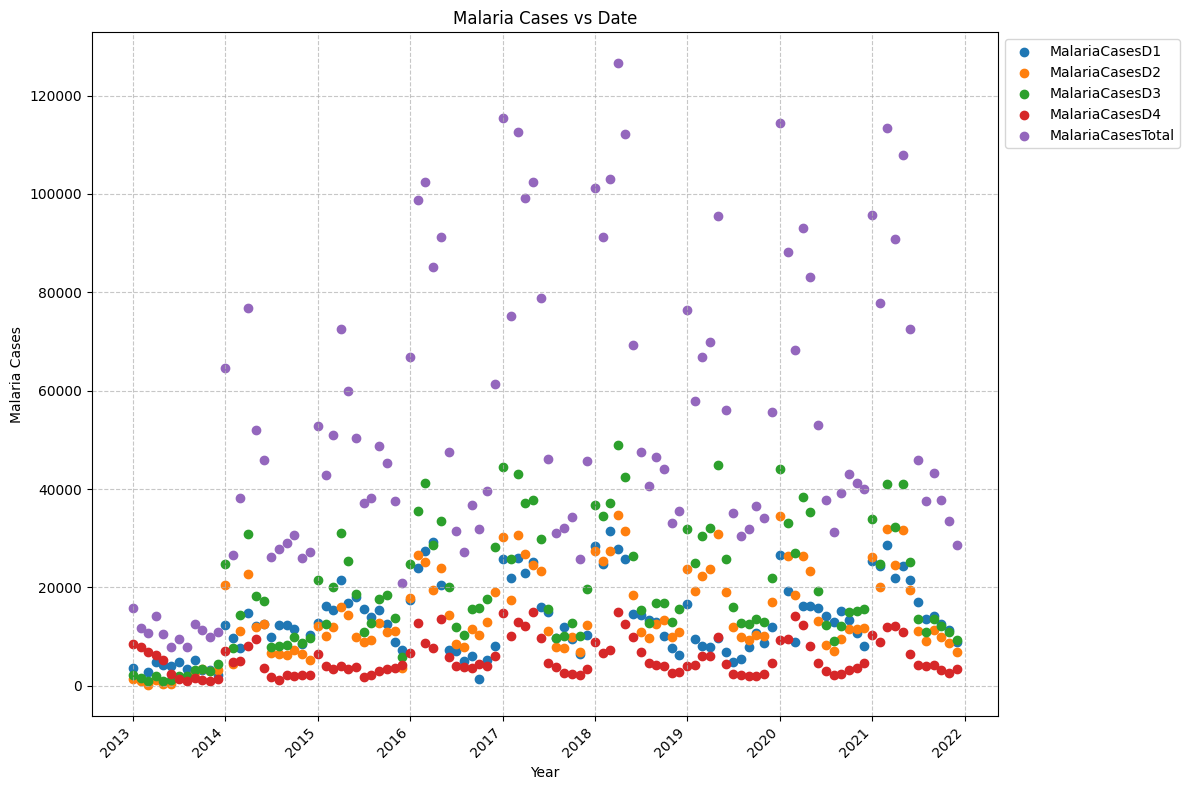

Selected Target Features:
Index(['MalariaCasesTotal'], dtype='object')
            MalariaCasesTotal
Year Month                   
2013 1                15764.0
     2                11727.0
     3                10672.0
     4                14136.0
     5                10570.0
...                       ...
2021 8                37489.0
     9                43249.0
     10               37687.0
     11               33573.0
     12               28557.0

[108 rows x 1 columns]


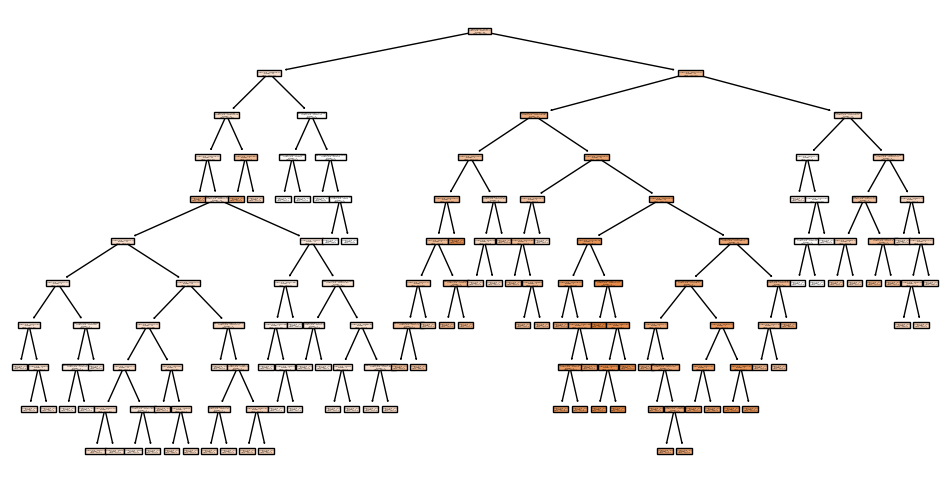

Decision Tree Model Performance:
Mean Squared Error: 265117417.72727272
Root Mean Squared Error: 16282.426653520437
R2 Score: 0.5401729798347825
Random Forest Model Performance:
Mean Squared Error: 204638258.56366408
Root Mean Squared Error: 14305.182926606149
R2 Score: 0.6450697149444624


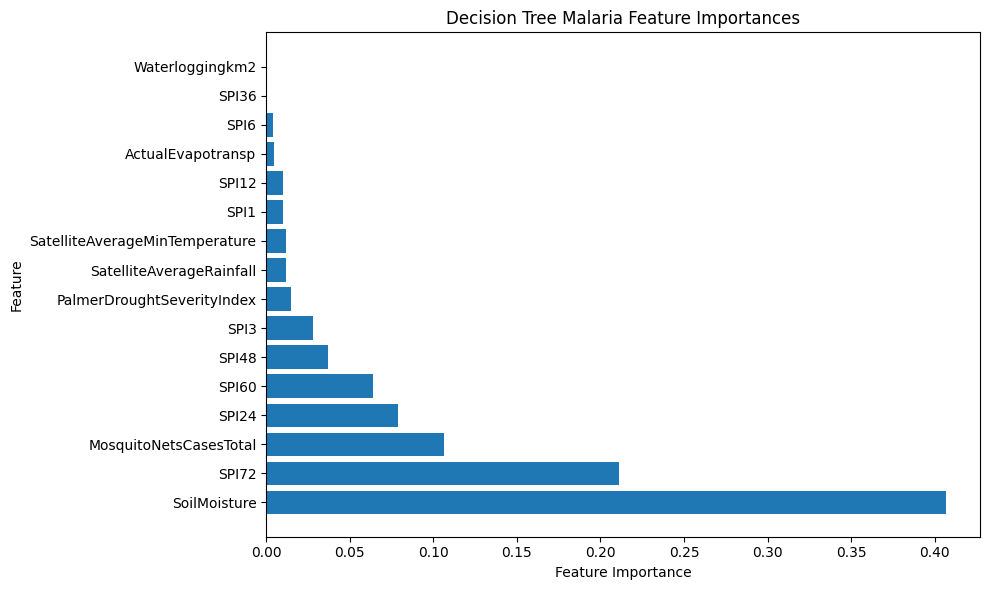

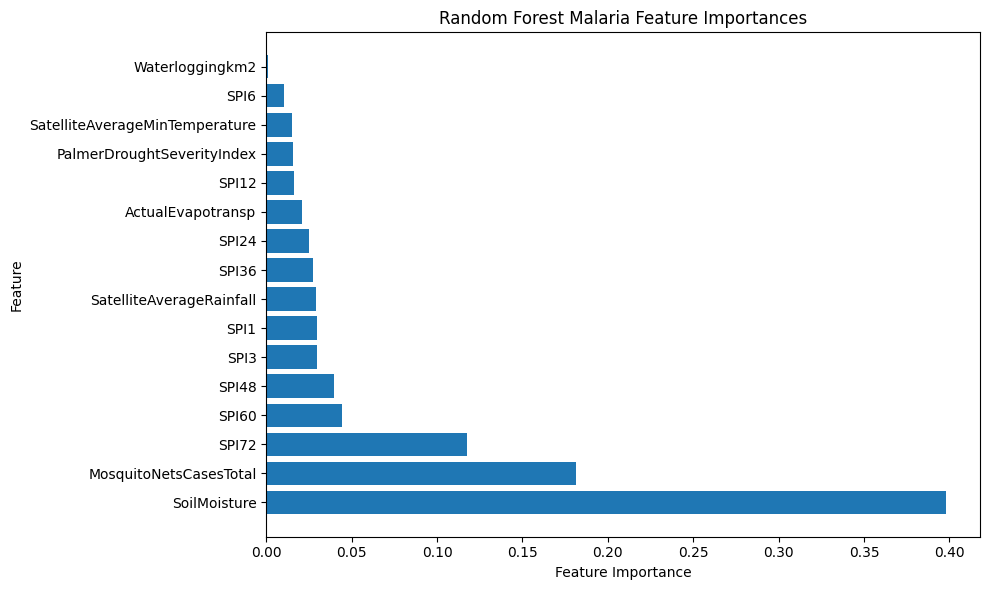

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'SatelliteAverageMinTemperature', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
    'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
    'SatelliteAverageRainfall',
    'PalmerDroughtSeverityIndex',
    'CholeraCasesD1' ,'CholeraCasesD2' ,'CholeraCasesD3', 'CholeraCasesD4',
    'CholeraCasesTotal',
    'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2', 'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
    'SchistosomiasisCasesTotal',
    'MalariaCasesD1', 'MalariaCasesD2', 'MalariaCasesD3', 'MalariaCasesD4',
    'MalariaCasesTotal',
    'MosquitoNetsCasesD1' ,'MosquitoNetsCasesD2','MosquitoNetsCasesD3','MosquitoNetsCasesD4',
    'MosquitoNetsCasesTotal',
    'CholeraCases_AllDistricts', 'CholeraDeaths_AllDistricts',
    'Malnutrition_LT5_NewCases_AllDistricts',
    'Malnutrition_LT5_InpatientDeaths_AllDistricts', 'DiarrhoeaCases_Machinga',
    'DiarrhoeaCases_Zomba', 'DiarrhoeaCases_Phalombe',
    'DiarrhoeaCases_AllDistricts', 'SchistosomiasisCases_Machinga',
    'SchistosomiasisCases_Zomba', 'SchistosomiasisCases_Phalombe',
    'SchistosomiasisCases_AllDistricts' ,'CholeraCasesDOH_Zomba',
    'MalariaCasesDOH_Zomba', 'DiarrheaCasesDOH_Zomba',
]  # Specify the desired column names

start_date = '2013-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# # Drop rows with missing values
# sub_dataset.dropna(inplace=True)

# Extract the features
features = sub_dataset[
    [
        'SatelliteAverageRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
        'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
        'SatelliteAverageMinTemperature', 'PalmerDroughtSeverityIndex','MosquitoNetsCasesTotal'
    ]
]
#-------------------------------------------------
# Plot selected features vs. date
# Filter the data based on the column names and date range
sub_datasetplot = data.loc[
    (data['Date'] >= '2013-01-01') & (data['Date'] <= '2021-12-01'), column_names
]

plt.figure(figsize=(12, 8))

for feature in [
    'MalariaCasesD1', 'MalariaCasesD2', 'MalariaCasesD3', 'MalariaCasesD4',
    'MalariaCasesTotal'
]:
    plt.scatter(sub_datasetplot['Date'], sub_datasetplot[feature], label=feature, marker='o')

plt.xlabel('Year')
plt.ylabel('Malaria Cases')
plt.title('Malaria Cases vs Date')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure in high-resolution JPG format
plt.savefig('MalariaCases_vs_date.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print the selected features
targetfeatures = sub_dataset[['MalariaCasesTotal']]
print("Selected Target Features:")
print(targetfeatures.columns)
print(targetfeatures)
#-------------------------------------------------
# Extract the target variable
target = sub_dataset['MalariaCasesTotal']

# Ensure the 'Date' column is in datetime format
sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# Sort the DataFrame based on the 'Date' column
sub_dataset.sort_values(by='Date', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create a decision tree regressor with max_depth=10 and criterion='friedman_mse'
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, criterion='friedman_mse')

# Fit the decision tree regressor to the training data
decision_tree_regressor.fit(X_train, y_train)

# Create a random forest regressor with n_estimators=100 and max_depth=6
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

# Fit the random forest regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Get feature importances from the decision tree regressor
decision_tree_importances = decision_tree_regressor.feature_importances_

# Sort feature importances in descending order for decision tree
decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

# Get the names of the features in descending order of importance for decision tree
decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

# Get feature importances from the random forest regressor
random_forest_importances = random_forest_regressor.feature_importances_

# Sort feature importances in descending order for random forest
random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

# Get the names of the features in descending order of importance for random forest
random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
plt.savefig('MalariaCasesTotal.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Malaria Feature Importances')
plt.tight_layout()
plt.savefig('decision_tree_Malaria_feature_importance.png')

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Malaria Feature Importances')
plt.tight_layout()
plt.savefig('random_forest_Malaria_feature_importance.png')

# Generate rules as Python function code for decision tree
decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
decision_tree_rules_text = "def predict_Malaria_cases_decision_tree(\n"
decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
decision_tree_rules_text += "\t# Malaria Decision Rules:\n"
decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

# Save rules as Python function code in a text file for decision tree
with open('Malaria_cases_rules_decision_tree.py', 'w') as file:
    file.write(decision_tree_rules_text)

# Generate rules as Python function code for random forest
random_forest_rules_text = "def predict_Malaria_cases_random_forest(\n"
random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
random_forest_rules_text += "\t# Malaria Decision Rules:\n"
random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

# Save rules as Python function code in a text file for random forest
with open('Malaria_cases_rules_random_forest.py', 'w') as file:
    file.write(random_forest_rules_text)

# # Save the training and testing sets as Excel
# X_train.to_excel('X_train.xlsx', index=False)
# X_test.to_excel('X_test.xlsx', index=False)
# y_train.to_excel('y_train.xlsx', index=False)
# y_test.to_excel('y_test.xlsx', index=False)

# Make predictions on the testing set using decision tree regressor
y_pred_decision_tree = decision_tree_regressor.predict(X_test)

# Make predictions on the testing set using random forest regressor
y_pred_random_forest = random_forest_regressor.predict(X_test)

# Evaluate decision tree model performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Evaluate random forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics for decision tree model
print("Decision Tree Model Performance:")
print("Mean Squared Error:", mse_decision_tree)
print("Root Mean Squared Error:", rmse_decision_tree)
print("R2 Score:", r2_decision_tree)

# Print the evaluation metrics for random forest model
print("Random Forest Model Performance:")
print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("R2 Score:", r2_random_forest)

# Show the plot
plt.show()

# Save the feature importances to an Excel file
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'DecisionTreeImportance': decision_tree_importances,
    'RandomForestImportance': random_forest_importances
})

feature_importance_df.to_excel('feature_importances.xlsx', index=False, engine='openpyxl')

# ... (remaining code)

### 4.6.8 Schistosomiasis Cases Prediction Using Decision Trees and Random Forests -----------

This code implements a prediction model for Schistosomiasis cases using decision tree regressors and random forest regressors. It filters and cleans the dataset, splits it into training and testing sets, trains the models, and evaluates their performance. Additionally, it visualizes the decision tree, plots feature importances, and generates rules for both models. The code also saves various outputs, such as Excel files for data, training/testing sets, and evaluation metrics.

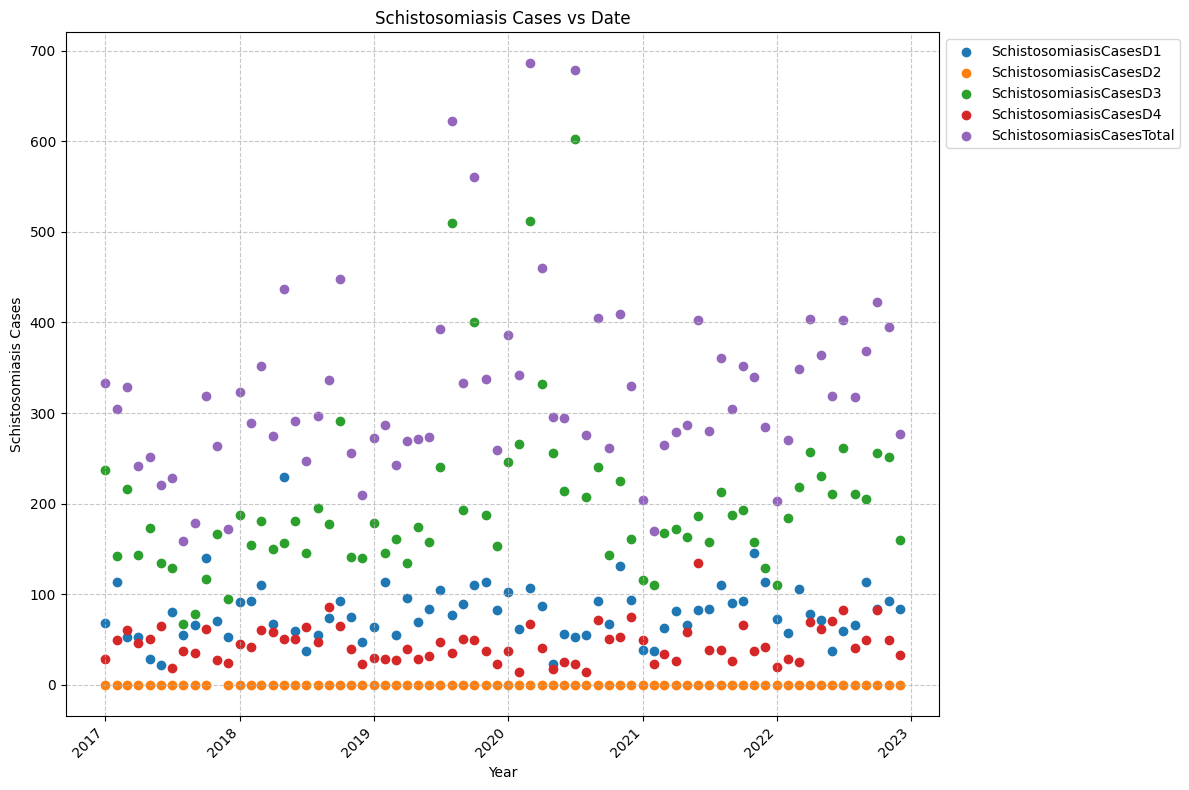

Selected Target Features:
Index(['SchistosomiasisCasesTotal'], dtype='object')
            SchistosomiasisCasesTotal
Year Month                           
2017 1                          333.0
     2                          304.0
     3                          329.0
     4                          242.0
     5                          252.0
     6                          221.0
     7                          228.0
     8                          159.0
     9                          179.0
     10                         319.0
     11                         264.0
     12                         172.0
2018 1                          323.0
     2                          289.0
     3                          352.0
     4                          275.0
     5                          437.0
     6                          291.0
     7                          247.0
     8                          297.0
     9                          337.0
     10                         448.0
     11  

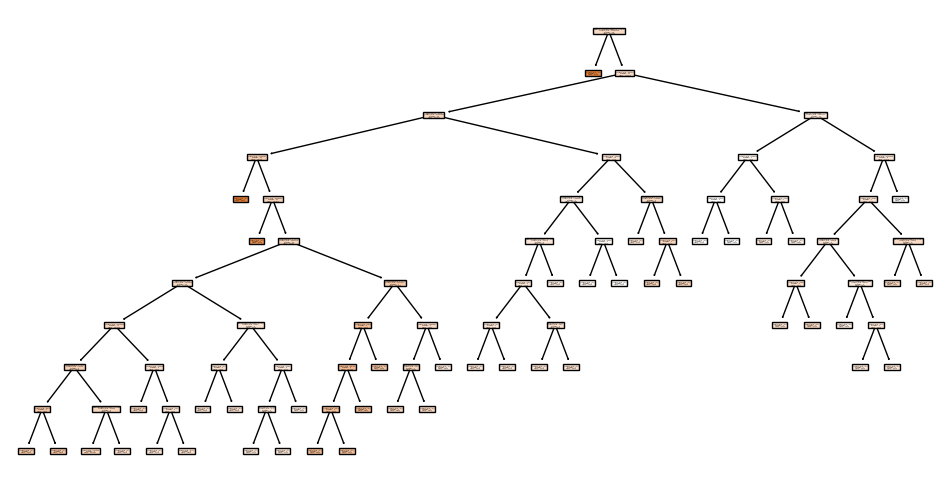

Decision Tree Model Performance:
Mean Squared Error: 19639.25
Root Mean Squared Error: 140.14010846292362
R2 Score: -1.2721263111888108
Random Forest Model Performance:
Mean Squared Error: 8368.77216329889
Root Mean Squared Error: 91.48099345382565
R2 Score: 0.031790550831833575


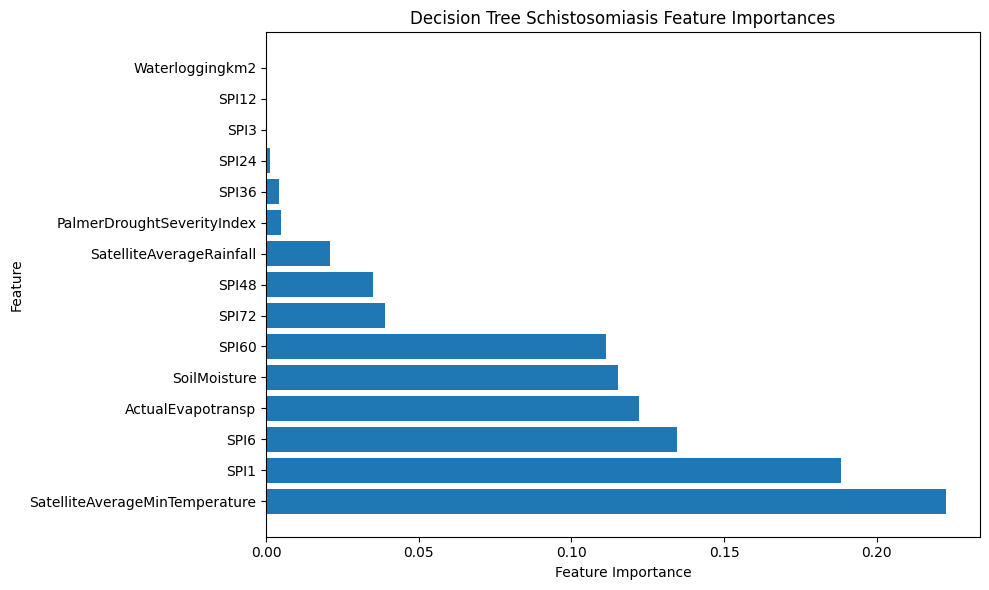

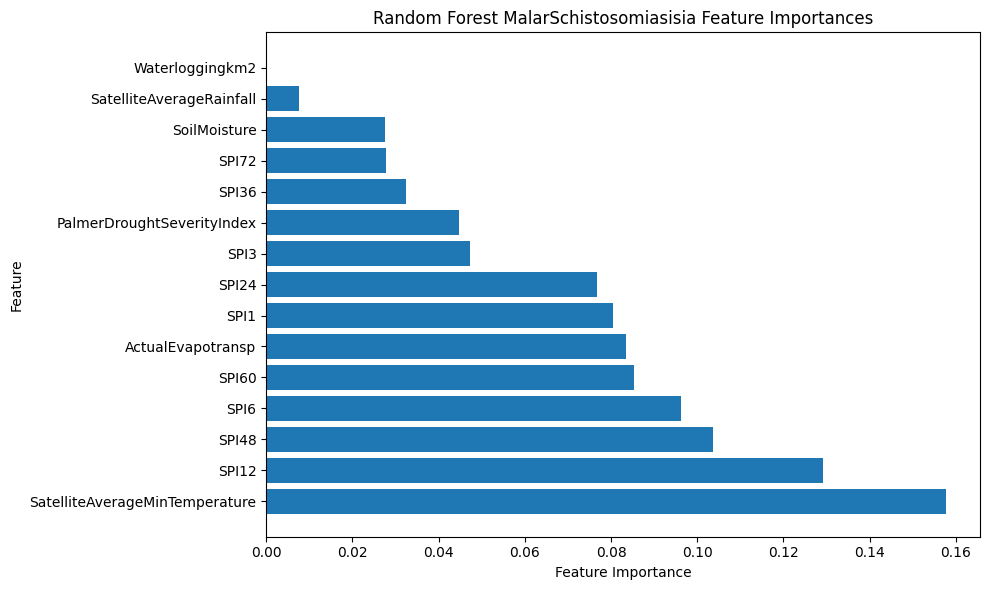

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'SatelliteAverageMinTemperature', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
    'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
    'SatelliteAverageRainfall',
    'PalmerDroughtSeverityIndex',
    'CholeraCasesD1' ,'CholeraCasesD2' ,'CholeraCasesD3', 'CholeraCasesD4',
    'CholeraCasesTotal',
    'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2', 'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
    'SchistosomiasisCasesTotal',
    'MalariaCasesD1', 'MalariaCasesD2', 'MalariaCasesD3', 'MalariaCasesD4',
    'MalariaCasesTotal',
    'MosquitoNetsCasesD1' ,'MosquitoNetsCasesD2','MosquitoNetsCasesD3','MosquitoNetsCasesD4',
    'MosquitoNetsCasesTotal',
    'CholeraCases_AllDistricts', 'CholeraDeaths_AllDistricts',
    'Malnutrition_LT5_NewCases_AllDistricts',
    'Malnutrition_LT5_InpatientDeaths_AllDistricts', 'DiarrhoeaCases_Machinga',
    'DiarrhoeaCases_Zomba', 'DiarrhoeaCases_Phalombe',
    'DiarrhoeaCases_AllDistricts', 'SchistosomiasisCases_Machinga',
    'SchistosomiasisCases_Zomba', 'SchistosomiasisCases_Phalombe',
    'SchistosomiasisCases_AllDistricts' ,'CholeraCasesDOH_Zomba',
    'MalariaCasesDOH_Zomba', 'DiarrheaCasesDOH_Zomba',
]  # Specify the desired column names

start_date = '2017-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# # Drop rows with missing values
# sub_dataset.dropna(inplace=True)

# Extract the features
features = sub_dataset[
    [
        'SatelliteAverageRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
        'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
        'SatelliteAverageMinTemperature', 'PalmerDroughtSeverityIndex'
    ]
]
#-------------------------------------------------
# Plot selected features vs. date
# Filter the data based on the column names and date range
sub_datasetplot = data.loc[
    (data['Date'] >= '2017-01-01') & (data['Date'] <= '2022-12-01'), column_names
]

plt.figure(figsize=(12, 8))

for feature in [
    'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2', 'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
    'SchistosomiasisCasesTotal'
]:
    plt.scatter(sub_datasetplot['Date'], sub_datasetplot[feature], label=feature, marker='o')

plt.xlabel('Year')
plt.ylabel('Schistosomiasis Cases')
plt.title('Schistosomiasis Cases vs Date')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure in high-resolution JPG format
plt.savefig('SchistosomiasisCases_vs_date.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print the selected features
targetfeatures = sub_dataset[['SchistosomiasisCasesTotal']]
print("Selected Target Features:")
print(targetfeatures.columns)
print(targetfeatures)
#-------------------------------------------------
# Extract the target variable
target = sub_dataset['SchistosomiasisCasesTotal']

# Ensure the 'Date' column is in datetime format
sub_dataset['Date'] = pd.to_datetime(sub_dataset['Date'])

# Sort the DataFrame based on the 'Date' column
sub_dataset.sort_values(by='Date', inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create a decision tree regressor with max_depth=10 and criterion='friedman_mse'
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, criterion='friedman_mse')

# Fit the decision tree regressor to the training data
decision_tree_regressor.fit(X_train, y_train)

# Create a random forest regressor with n_estimators=100 and max_depth=6
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

# Fit the random forest regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Get feature importances from the decision tree regressor
decision_tree_importances = decision_tree_regressor.feature_importances_

# Sort feature importances in descending order for decision tree
decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

# Get the names of the features in descending order of importance for decision tree
decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

# Get feature importances from the random forest regressor
random_forest_importances = random_forest_regressor.feature_importances_

# Sort feature importances in descending order for random forest
random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

# Get the names of the features in descending order of importance for random forest
random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
plt.savefig('SchistosomiasisCasesTotal.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Schistosomiasis Feature Importances')
plt.tight_layout()
plt.savefig('decision_tree_Schistosomiasis_feature_importance.png')

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest MalarSchistosomiasisia Feature Importances')
plt.tight_layout()
plt.savefig('random_forest_Schistosomiasis_feature_importance.png')

# Generate rules as Python function code for decision tree
decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
decision_tree_rules_text = "def predict_Schistosomiasis_cases_decision_tree(\n"
decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
decision_tree_rules_text += "\t# Schistosomiasis Decision Rules:\n"
decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

# Save rules as Python function code in a text file for decision tree
with open('Schistosomiasis_cases_rules_decision_tree.py', 'w') as file:
    file.write(decision_tree_rules_text)

# Generate rules as Python function code for random forest
random_forest_rules_text = "def predict_Schistosomiasis_cases_random_forest(\n"
random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
random_forest_rules_text += "\t# Schistosomiasis Decision Rules:\n"
random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

# Save rules as Python function code in a text file for random forest
with open('Schistosomiasis_cases_rules_random_forest.py', 'w') as file:
    file.write(random_forest_rules_text)

# # Save the training and testing sets as Excel
# X_train.to_excel('X_train.xlsx', index=False)
# X_test.to_excel('X_test.xlsx', index=False)
# y_train.to_excel('y_train.xlsx', index=False)
# y_test.to_excel('y_test.xlsx', index=False)

# Make predictions on the testing set using decision tree regressor
y_pred_decision_tree = decision_tree_regressor.predict(X_test)

# Make predictions on the testing set using random forest regressor
y_pred_random_forest = random_forest_regressor.predict(X_test)

# Evaluate decision tree model performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Evaluate random forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics for decision tree model
print("Decision Tree Model Performance:")
print("Mean Squared Error:", mse_decision_tree)
print("Root Mean Squared Error:", rmse_decision_tree)
print("R2 Score:", r2_decision_tree)

# Print the evaluation metrics for random forest model
print("Random Forest Model Performance:")
print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("R2 Score:", r2_random_forest)

# Show the plot
plt.show()

# Save the feature importances to an Excel file
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'DecisionTreeImportance': decision_tree_importances,
    'RandomForestImportance': random_forest_importances
})

feature_importance_df.to_excel('Schistosomiasisfeature_importances.xlsx', index=False, engine='openpyxl')

# 6.0 Analyzing Population Distribution by Age and Gender


This code focuses on population distribution coefficients, representing the proportion of individuals in different age groups categorized by gender. The coefficients are stored in a DataFrame and converted from fractions to percentages. The table is printed and saved as an Excel file.

Additionally, a double bar chart is generated to visually represent the population distribution. The chart compares the proportions of males and females in each age group. The plot includes age labels, grid lines, and values displayed on the bars. The resulting chart is saved as a high-quality JPG file and displayed.

Data shape: (17, 3)
      Age  Male  Female
0     0-4   9.0     8.9
1     5-9   7.5     7.4
2   10-14   6.2     6.5
3   15-19   5.2     5.5
4   20-24   4.4     4.7
5   25-29   3.6     3.9
6   30-34   2.9     3.2
7   35-39   2.4     2.7
8   40-44   1.8     2.0
9   45-49   1.4     1.6
10  50-54   1.1     1.2
11  55-59   0.9     1.1
12  60-64   0.7     0.8
13  65-69   0.5     0.7
14  70-74   0.4     0.5
15  75-79   0.3     0.4
16    80+   0.4     0.5


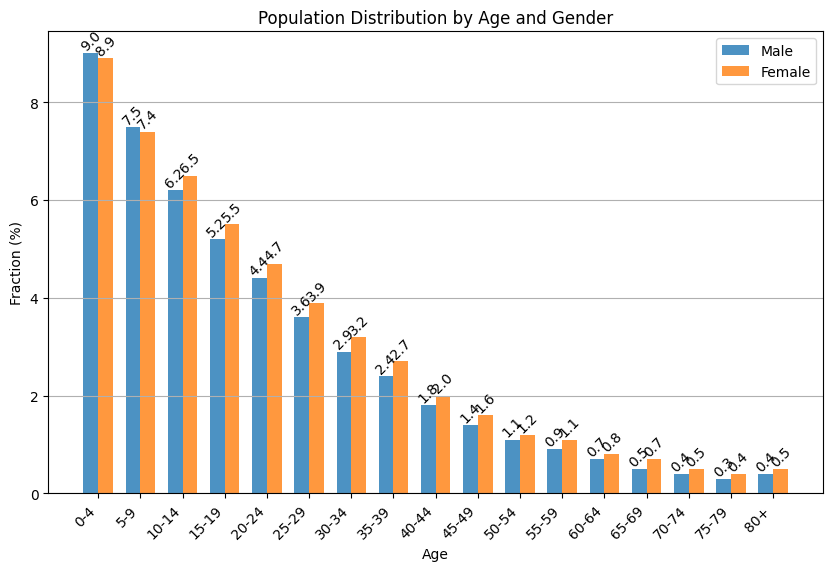

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Population distribution coefficients table
population_distribution_coefficients = pd.DataFrame({
    'Age': ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'],
    'Male': [0.090, 0.075, 0.062, 0.052, 0.044, 0.036, 0.029, 0.024, 0.018, 0.014, 0.011, 0.009, 0.007, 0.005, 0.004, 0.003, 0.004],
    'Female': [0.089, 0.074, 0.065, 0.055, 0.047, 0.039, 0.032, 0.027, 0.020, 0.016, 0.012, 0.011, 0.008, 0.007, 0.005, 0.004, 0.005]
})

# Convert fractions to percentages
population_distribution_coefficients['Male'] *= 100
population_distribution_coefficients['Female'] *= 100

# Check the shape of the data
print("Data shape:", population_distribution_coefficients.shape)

# Print the table
print(population_distribution_coefficients)

# Save the table as an Excel file
population_distribution_coefficients.to_excel("population_distribution_coefficients.xlsx", index=False)

# Plotting the double bar chart
age_labels = population_distribution_coefficients['Age']
bar_width = 0.35
index = np.arange(len(age_labels))

plt.figure(figsize=(10, 6))
plt.bar(index, population_distribution_coefficients['Male'], bar_width, label='Male', alpha=0.8)
plt.bar(index + bar_width, population_distribution_coefficients['Female'], bar_width, label='Female', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Fraction (%)')
plt.title('Population Distribution by Age and Gender')
plt.xticks(index + bar_width / 2, age_labels, rotation=45, ha='right')
plt.legend()

# Add grid lines
plt.grid(True, axis='y')

# Add values on the bar chart
for i, v in enumerate(population_distribution_coefficients['Male']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=45)
for i, v in enumerate(population_distribution_coefficients['Female']):
    plt.text(i + bar_width, v, str(round(v, 2)), ha='center', va='bottom', rotation=45)

# Save the plot in high-quality JPG format
plt.savefig('population_distribution_chart.jpg', dpi=300)

# Display the plot
plt.show()

# 7.0 Analyzing Pair Depencency (Correlation)

# 8.0 Other trial and error codes

In [ ]:
from tabulate import tabulate

# Define the data
data1 = {
    'MaxTemp': sub_dataset_temperature['MaxTemp'],
    'MakokaMaxTemp': sub_dataset_temperature['MakokaMaxTemp']
}

# Create a table
table = tabulate(data1, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)

╒═══════════╤═════════════════╕
│   MaxTemp │   MakokaMaxTemp │
╞═══════════╪═════════════════╡
│   28.2575 │            26.2 │
├───────────┼─────────────────┤
│   29.1691 │            26.7 │
├───────────┼─────────────────┤
│   28.3783 │            26.3 │
├───────────┼─────────────────┤
│   27.5142 │            25.8 │
├───────────┼─────────────────┤
│   25.3213 │            23.6 │
├───────────┼─────────────────┤
│   24.3143 │            23.2 │
├───────────┼─────────────────┤
│   24.16   │            22.1 │
├───────────┼─────────────────┤
│   25.0074 │            23.6 │
├───────────┼─────────────────┤
│   28.0413 │            26.3 │
├───────────┼─────────────────┤
│   32.4432 │            30.6 │
├───────────┼─────────────────┤
│   31.6028 │            30   │
├───────────┼─────────────────┤
│   27.8667 │            26.3 │
├───────────┼─────────────────┤
│   28.51   │            26.6 │
├───────────┼─────────────────┤
│   28.6862 │            26.5 │
├───────────┼─────────────────┤
│   28.3